### IMPORT LIBRARY NECESSARY

In [50]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from PIL import Image

### `DATA CLEANING AND PREPROCESSING`

In [165]:
df = pd.read_csv('./My_Raw_Data/anime_28_11_2023.csv')

Kiểm tra qua data sử dụng info

In [166]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 51 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   post_id                        120 non-null    int64  
 1   text                           120 non-null    object 
 2   post_text                      120 non-null    object 
 3   shared_text                    0 non-null      float64
 4   original_text                  18 non-null     object 
 5   time                           120 non-null    object 
 6   timestamp                      120 non-null    int64  
 7   image                          119 non-null    object 
 8   image_lowquality               120 non-null    object 
 9   images                         120 non-null    object 
 10  images_description             120 non-null    object 
 11  images_lowquality              120 non-null    object 
 12  images_lowquality_description  120 non-null    obj

In [167]:
df.describe()

post_id  shared_text     timestamp  video  video_duration_seconds  \
count  1.200000e+02          0.0  1.200000e+02    0.0                     0.0   
mean   7.445697e+14          NaN  1.700271e+09    NaN                     NaN   
std    3.353734e+12          NaN  4.884216e+05    NaN                     NaN   
min    7.384291e+14          NaN  1.699364e+09    NaN                     NaN   
25%    7.416674e+14          NaN  1.699857e+09    NaN                     NaN   
50%    7.446085e+14          NaN  1.700272e+09    NaN                     NaN   
75%    7.475792e+14          NaN  1.700701e+09    NaN                     NaN   
max    7.503439e+14          NaN  1.701131e+09    NaN                     NaN   

       video_height  video_id  video_quality  video_size_MB  video_thumbnail  \
count           0.0       0.0            0.0            0.0              0.0   
mean            NaN       NaN            NaN            NaN              NaN   
std             NaN       NaN            NaN            NaN              NaN   
min             NaN       NaN            NaN            NaN              NaN   
25%             NaN       NaN            NaN            NaN              NaN   
50%             NaN       NaN            NaN            NaN              NaN   
75%             NaN       NaN            NaN            NaN              NaN   
max             NaN       NaN            NaN            NaN              NaN   

       ...  shared_post_id  shared_time  shared_user_id  shared_username  \
count  ...             0.0          0.0             0.0              0.0   
mean   ...             NaN          NaN             NaN              NaN   
std    ...             NaN          NaN             NaN              NaN   
min    ...             NaN          NaN             NaN              NaN   
25%    ...             NaN          NaN             NaN              NaN   
50%    ...             NaN          NaN             NaN              NaN   
75%    ...             NaN          NaN             NaN              NaN   
max    ...             NaN          NaN             NaN              NaN   

       shared_post_url  reaction_count  with       page_id  sharers  \
count              0.0      120.000000   0.0  1.200000e+02      0.0   
mean               NaN    13390.083333   NaN  1.788112e+15      NaN   
std                NaN     9518.625812   NaN  5.020964e-01      NaN   
min                NaN      684.000000   NaN  1.788112e+15      NaN   
25%                NaN     5874.500000   NaN  1.788112e+15      NaN   
50%                NaN    12333.500000   NaN  1.788112e+15      NaN   
75%                NaN    17835.250000   NaN  1.788112e+15      NaN   
max                NaN    65512.000000   NaN  1.788112e+15      NaN   

           image_id  
count  1.200000e+02  
mean   7.445696e+14  
std    3.353721e+12  
min    7.384291e+14  
25%    7.416648e+14  
50%    7.446085e+14  
75%    7.475791e+14  
max    7.503439e+14  

[8 rows x 28 columns]

In [168]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
115    False
116    False
117    False
118    False
119    False
Length: 120, dtype: bool

In [169]:
#! delete all 0 non-null row:
df = df.drop(columns=['post_id','user_url','image_id','comments_full','user_id','links','reactors','image_id','sharers','text','shared_username','shared_user_id','factcheck','shared_post_id','shared_time','images_lowquality_description','w3_fb_url','link','shared_post_url','video_thumbnail','video_watches','video_width','shared_text','original_text','image','images','timestamp','images_description','images_lowquality','page_id','video','video_duration_seconds','video_height','video_id','video_quality','video_size_MB','image_ids','was_live','is_live','available','username','fetched_time','with'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   post_text         120 non-null    object
 1   time              120 non-null    object
 2   image_lowquality  120 non-null    object
 3   likes             120 non-null    int64 
 4   comments          120 non-null    int64 
 5   shares            120 non-null    int64 
 6   post_url          120 non-null    object
 7   reactions         117 non-null    object
 8   reaction_count    120 non-null    int64 
dtypes: int64(4), object(5)
memory usage: 8.6+ KB


Sort toàn bộ bộ dữ liệu theo dạng từ từ 29/10 - 15/11. Không để ngược thế này khó phân tích

In [170]:
df= df.sort_values(by='time',ascending=True,ignore_index=True)
df['post_ID'] = np.arange(1,121,1)
df['time'] = pd.to_datetime(df['time']) #! convert to date time to take the day in that month. we only have 100 post from 29/10 to 15/11 Bởi vậy chắc chắn các ngày đăng là unique. 
df.head(5)

post_text                time  \
0  Từ khoảnh khắc ấy thế giới lại có thêm một sad... 2023-11-07 20:30:07   
1              Như này thì cần gì phải ăn sáng :)))) 2023-11-08 19:14:04   
2    💔\n\n🎥: Mộ đom đóm\n\n💔\n\n🎥: Tomb of Fireflies 2023-11-08 21:00:23   
3  Ông chủ giả dạng để bán hành nhân viên nhưng b... 2023-11-09 10:10:13   
4  Cuộc đối thoại bất ổn giữa sếp và nhân viên ch... 2023-11-09 11:38:37   

                                    image_lowquality  likes  comments  shares  \
0  https://scontent.fhan17-1.fna.fbcdn.net/v/t39....  25000       945     454   
1  https://scontent.fhan17-1.fna.fbcdn.net/v/t39....  15000       397     503   
2  https://scontent.fhan17-1.fna.fbcdn.net/v/t39....   3300        59      17   
3  https://scontent.fhan17-1.fna.fbcdn.net/v/t39....  15705       425     209   
4  https://scontent.fhan17-1.fna.fbcdn.net/v/t39....  14704       588      71   

                                            post_url  \
0  https://facebook.com/AnimeMyHeart/posts/738429...   
1  https://facebook.com/AnimeMyHeart/posts/738973...   
2  https://facebook.com/AnimeMyHeart/posts/739020...   
3  https://facebook.com/AnimeMyHeart/posts/739314...   
4  https://facebook.com/AnimeMyHeart/posts/739342...   

                                           reactions  reaction_count  post_ID  
0                                                NaN           25000        1  
1                                                NaN           15000        2  
2                                                NaN            3300        3  
3  {'like': 15705, 'love': 125, 'haha': 11783, 'w...           27781        4  
4  {'like': 14704, 'love': 70, 'haha': 7179, 'wow...           22111        5

fill na bằng giá trị likes. Bởi vì post đó chỉ có mỗi like, ngoài ra không còn reaction nào khác

In [171]:
#! chỉ 3 giá trị đầu là null
for i in range(3):
    value = str({'like':df['likes'].iloc[i]})
    df['reactions'].iloc[i] = value

C:\Users\ASUS\AppData\Local\Temp\ipykernel_23900\2289159744.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['reactions'].iloc[i] = value
C:\Users\ASUS\AppData\Local\Temp\ipykernel_23900\2289159744.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['reactions'].iloc[i] = value
C:\Users\ASUS\AppData\Local\Temp\ipykernel_23900\2289159744.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['reactions'].iloc[i] = value


In [172]:
df['reactions']

0                                        {'like': 25000}
1                                        {'like': 15000}
2                                         {'like': 3300}
3      {'like': 15705, 'love': 125, 'haha': 11783, 'w...
4      {'like': 14704, 'love': 70, 'haha': 7179, 'wow...
                             ...                        
115    {'like': 3214, 'love': 42, 'haha': 2849, 'wow'...
116    {'like': 911, 'love': 8, 'haha': 341, 'wow': 1...
117    {'like': 2213, 'love': 917, 'haha': 36, 'wow':...
118    {'like': 3497, 'love': 51, 'haha': 2225, 'wow'...
119                {'like': 341, 'love': 3, 'haha': 340}
Name: reactions, Length: 120, dtype: object

In [174]:
like = []
love = []
haha = []
wow = []
care = []
sad = []
angry = []
for i in range(0,120):
    react_row = df.iloc[i]
    reaction = dict(eval(react_row['reactions']))
    like.append(reaction['like'])
    if 'haha' not in reaction:
        reaction['haha'] = 0
    haha.append(reaction['haha'])
    if 'care' not in reaction:
        reaction['care'] = 0
    care.append(reaction['care'])
    if 'wow' not in reaction:
        reaction['wow'] = 0
    wow.append(reaction['wow'])
    if 'sad' not in reaction:
        reaction['sad'] = 0
    sad.append(reaction['sad'])
    if 'angry' not in reaction:
        reaction['angry'] = 0
    angry.append(reaction['angry'])
    if 'love' not in reaction:
        reaction['love'] = 0
    love.append(reaction['love'])
share = df['shares']
comment = df['comments']

In [175]:
Total_reactions = pd.DataFrame({'post_ID': df['post_ID'], 'like':like, 'love':love,'haha':haha,'wow':wow,'care':care,'sad':sad,'angry':angry,'share':share,'comment':comment})

### `DATA ANALYSIS`

Kiểm tra 1 post có trung bình bao nhiêu cmt?

In [177]:
df['comments'].mean()

247.7

Post nào có lượng reaction nhiều nhất?

In [178]:
import random
random_color = ["#"+''.join([random.choice('0123456789abcdef') for j in range(6)]) for i in range(120)]

(array([    0., 10000., 20000., 30000., 40000., 50000., 60000., 70000.]),
 [Text(0, 0.0, '0'),
  Text(0, 10000.0, '10000'),
  Text(0, 20000.0, '20000'),
  Text(0, 30000.0, '30000'),
  Text(0, 40000.0, '40000'),
  Text(0, 50000.0, '50000'),
  Text(0, 60000.0, '60000'),
  Text(0, 70000.0, '70000')])

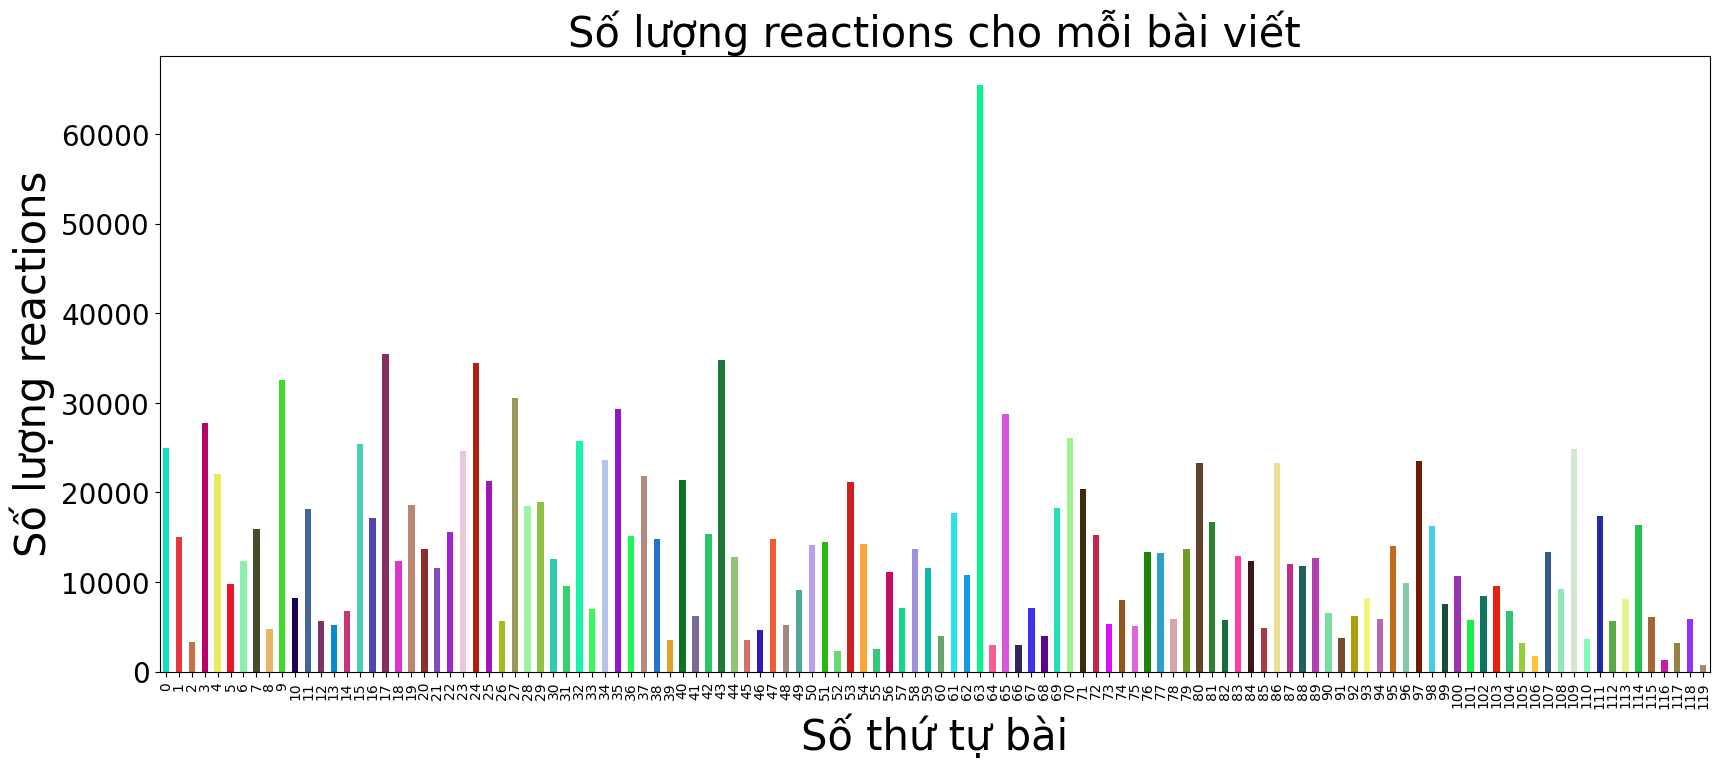

In [179]:
plt.figure(figsize=(20,8))
plt.title("Số lượng reactions cho mỗi bài viết",size=30)
plt.xlabel("Số thứ tự bài",size=30)
plt.ylabel("Số lượng reactions",size=30)

df['reaction_count'].plot(kind='bar',figsize=(20,8),color=random_color)
plt.xticks(rotation=90,size=10)
plt.yticks(size=20)

In [180]:
df[df['reaction_count'] == df['reaction_count'].max()]

post_text                time  \
63  Cô giáo tuyệt vời thật sự 😢\n\nGreat teacher i... 2023-11-18 18:05:03   

                                     image_lowquality  likes  comments  \
63  https://scontent.fhan17-1.fna.fbcdn.net/v/t39....  44294       320   

    shares                                           post_url  \
63     464  https://facebook.com/AnimeMyHeart/posts/744820...   

                                            reactions  reaction_count  post_ID  
63  {'like': 44294, 'love': 17897, 'haha': 1752, '...           65512       64

In [181]:
df.iloc[107]['post_url']

'https://facebook.com/AnimeMyHeart/posts/748997290590976'

<Axes: title={'center': 'Số lượng bình luận cho mỗi bài viết'}, xlabel='Số thứ tự bài', ylabel='Số lượng bình luận'>

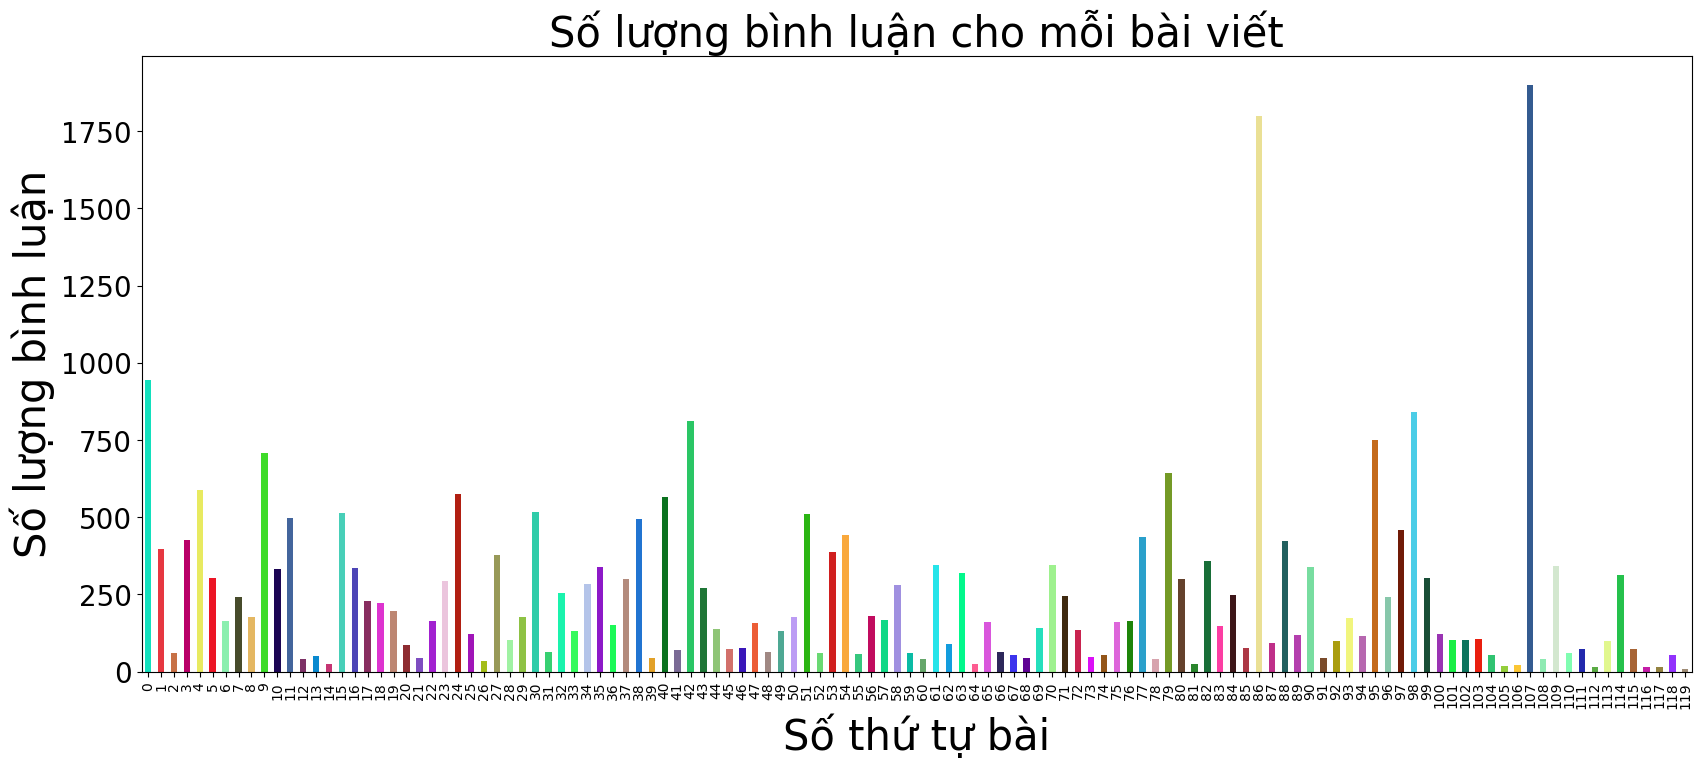

In [182]:
plt.figure(figsize=(20,8))
plt.title("Số lượng bình luận cho mỗi bài viết",size=30)
plt.xlabel("Số thứ tự bài",size=30)
plt.ylabel("Số lượng bình luận",size=30)
plt.xticks(rotation=90,size=10)
plt.yticks(size=20)
df['comments'].plot(kind='bar',figsize=(20,8),color=random_color)

In [183]:
df[df['comments'] == df['comments'].max()]

post_text                time  \
107  ‎The Boy and the Heron, bộ phim Ghibli đầu tiê... 2023-11-25 20:30:16   

                                      image_lowquality  likes  comments  \
107  https://scontent.fhan17-1.fna.fbcdn.net/v/t39....   8486      1900   

     shares                                           post_url  \
107     789  https://facebook.com/AnimeMyHeart/posts/748997...   

                                             reactions  reaction_count  \
107  {'like': 8486, 'love': 4607, 'haha': 39, 'wow'...           13322   

     post_ID  
107      108

<Axes: title={'center': 'Số lượng shares cho mỗi bài viết'}, xlabel='Số thứ tự bài', ylabel='Số lượng shares'>

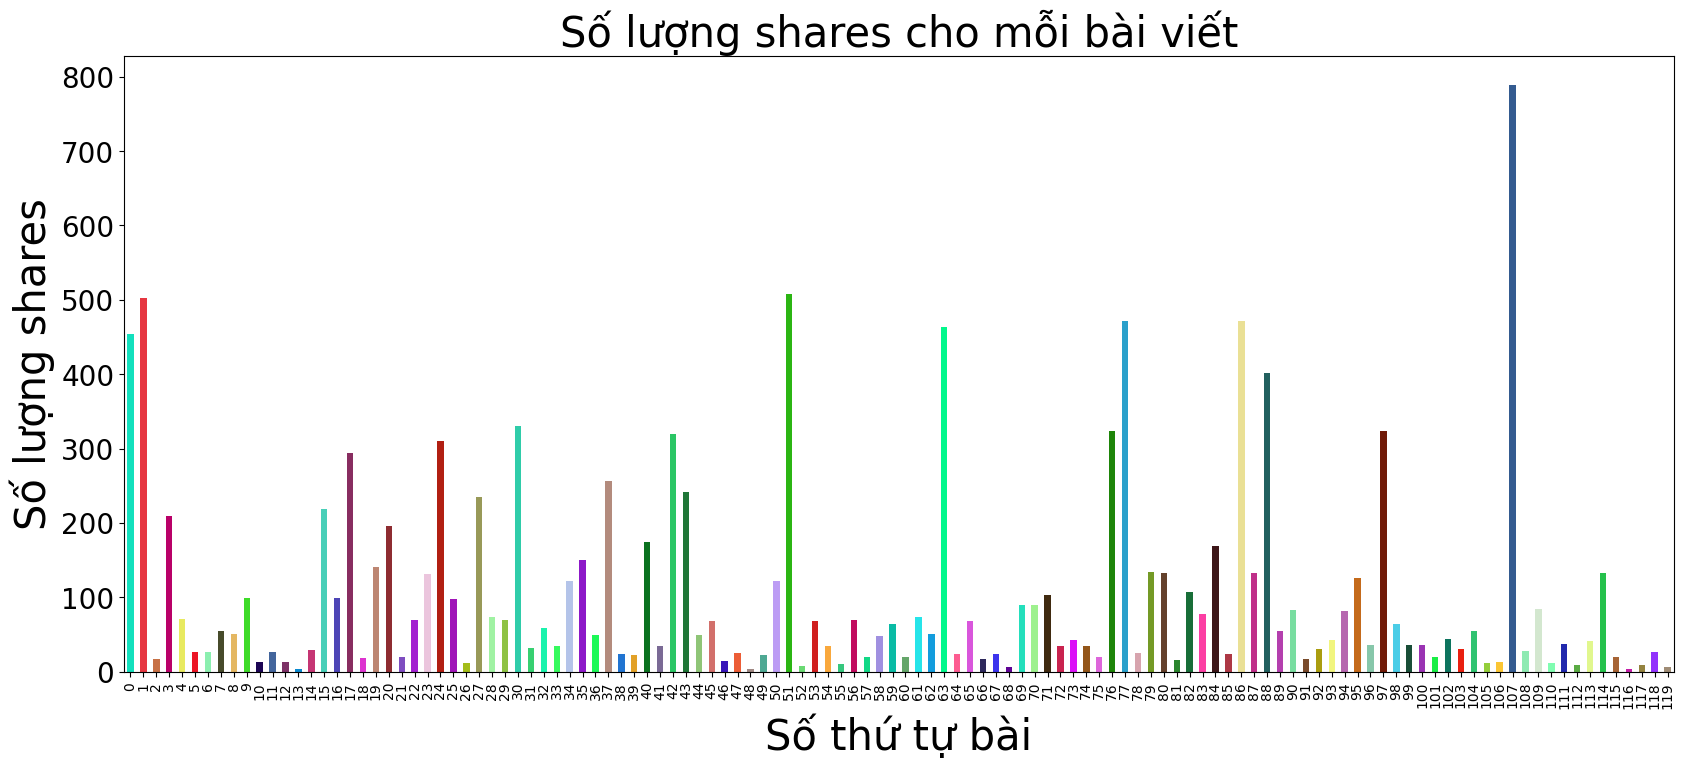

In [184]:
plt.figure(figsize=(20,8))
plt.title("Số lượng shares cho mỗi bài viết",size=30)
plt.xlabel("Số thứ tự bài",size=30)
plt.ylabel("Số lượng shares",size=30)
plt.xticks(rotation=90,size=10)
plt.yticks(size=20)
df['shares'].plot(kind='bar',figsize=(20,8),color=random_color)

In [185]:
df[df['shares'] == df['shares'].max()]

post_text                time  \
107  ‎The Boy and the Heron, bộ phim Ghibli đầu tiê... 2023-11-25 20:30:16   

                                      image_lowquality  likes  comments  \
107  https://scontent.fhan17-1.fna.fbcdn.net/v/t39....   8486      1900   

     shares                                           post_url  \
107     789  https://facebook.com/AnimeMyHeart/posts/748997...   

                                             reactions  reaction_count  \
107  {'like': 8486, 'love': 4607, 'haha': 39, 'wow'...           13322   

     post_ID  
107      108

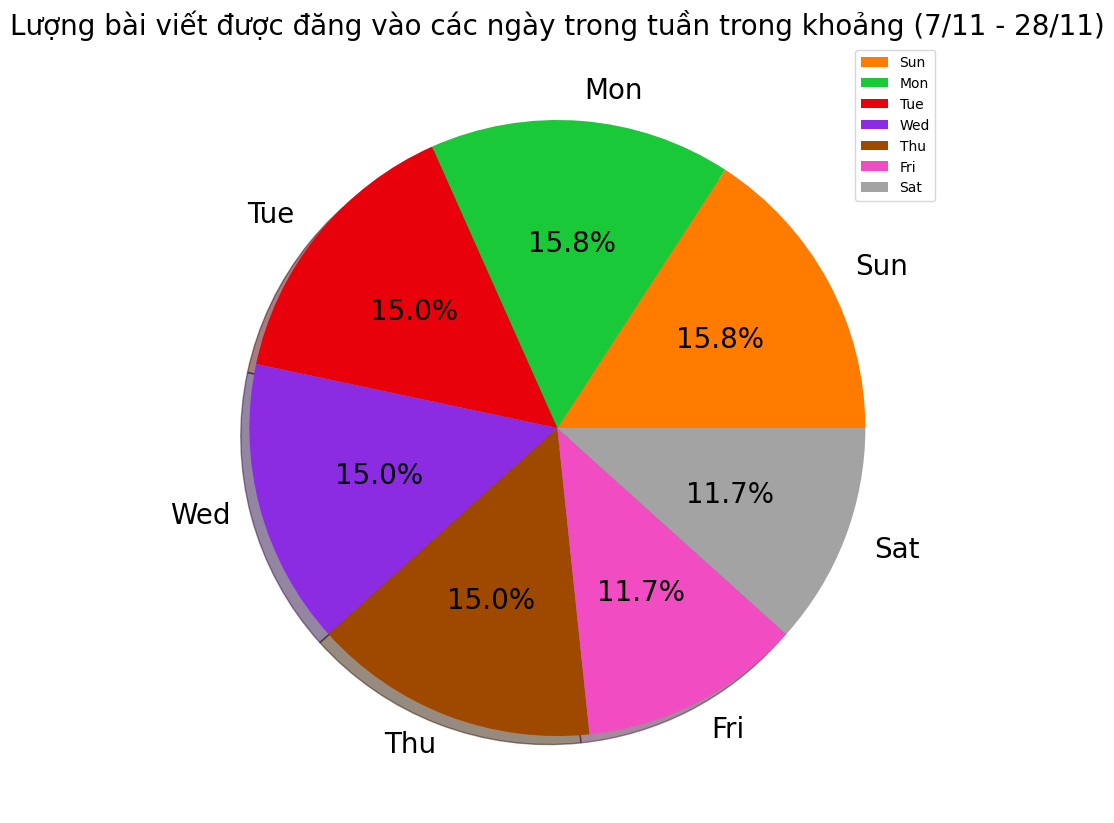

In [186]:
#! Các bài viết chủ yếu được đăng những ngày nào trong tuần?
colors = sns.color_palette('bright')[1:10]
plt.figure(figsize=(20,10))
plt.title("Lượng bài viết được đăng vào các ngày trong tuần trong khoảng (7/11 - 28/11)",size=20)

plt.pie(x=df['time'].dt.strftime('%a').value_counts(),labels=['Sun','Mon','Tue','Wed','Thu','Fri','Sat'], 
        colors = colors, autopct='%1.1f%%',shadow=True,textprops={'fontsize': 20})
plt.legend()
plt.show()

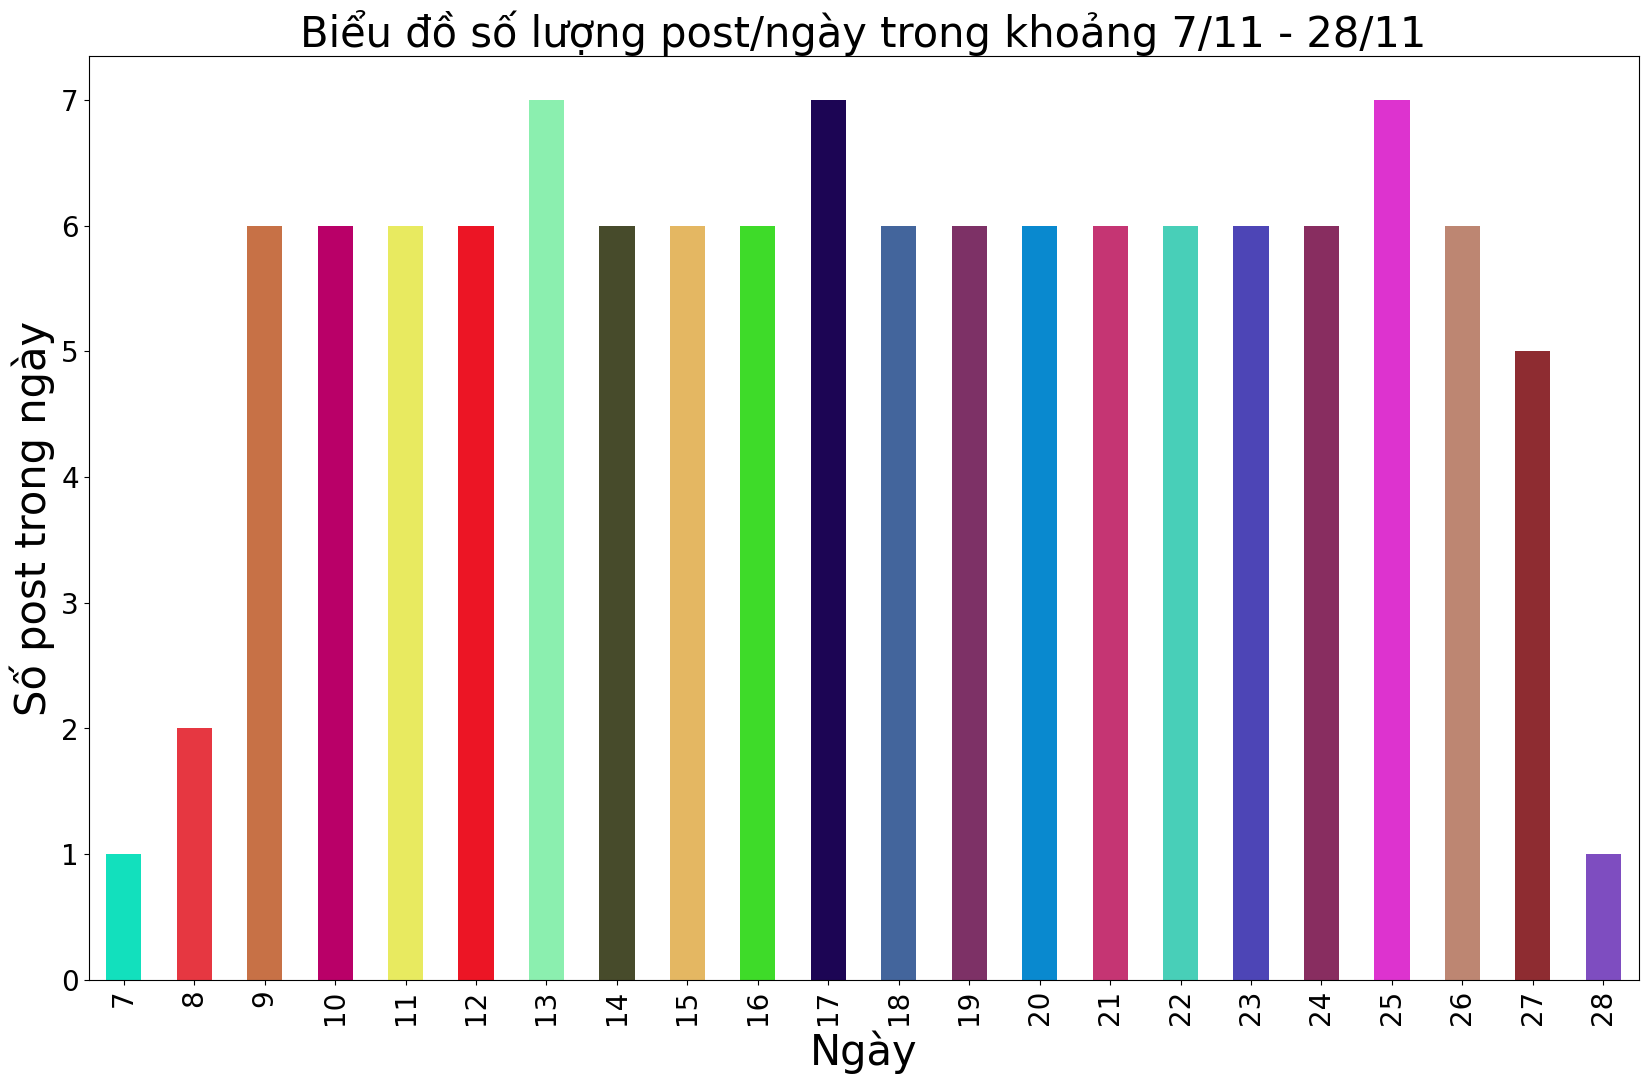

In [187]:
number_of_post_per_day = df['time'].sort_values(ascending=True).dt.day.value_counts(sort=False)
plt.ylabel("Số post trong ngày",size=30)
number_of_post_per_day.plot(kind='bar',figsize=(20,12),color=random_color)
plt.title("Biểu đồ số lượng post/ngày trong khoảng 7/11 - 28/11",size=30)
plt.xlabel("Ngày",size=30)
plt.xticks(size=20)
plt.yticks(size=20)

plt.show()

Chủ post có thực sự bận vào thứ 4 không? Cùng xem trong khoảng 7/11 - 28/11

(array([0., 1., 2., 3., 4., 5., 6., 7.]),
 [Text(0, 0.0, '0'),
  Text(0, 1.0, '1'),
  Text(0, 2.0, '2'),
  Text(0, 3.0, '3'),
  Text(0, 4.0, '4'),
  Text(0, 5.0, '5'),
  Text(0, 6.0, '6'),
  Text(0, 7.0, '7')])

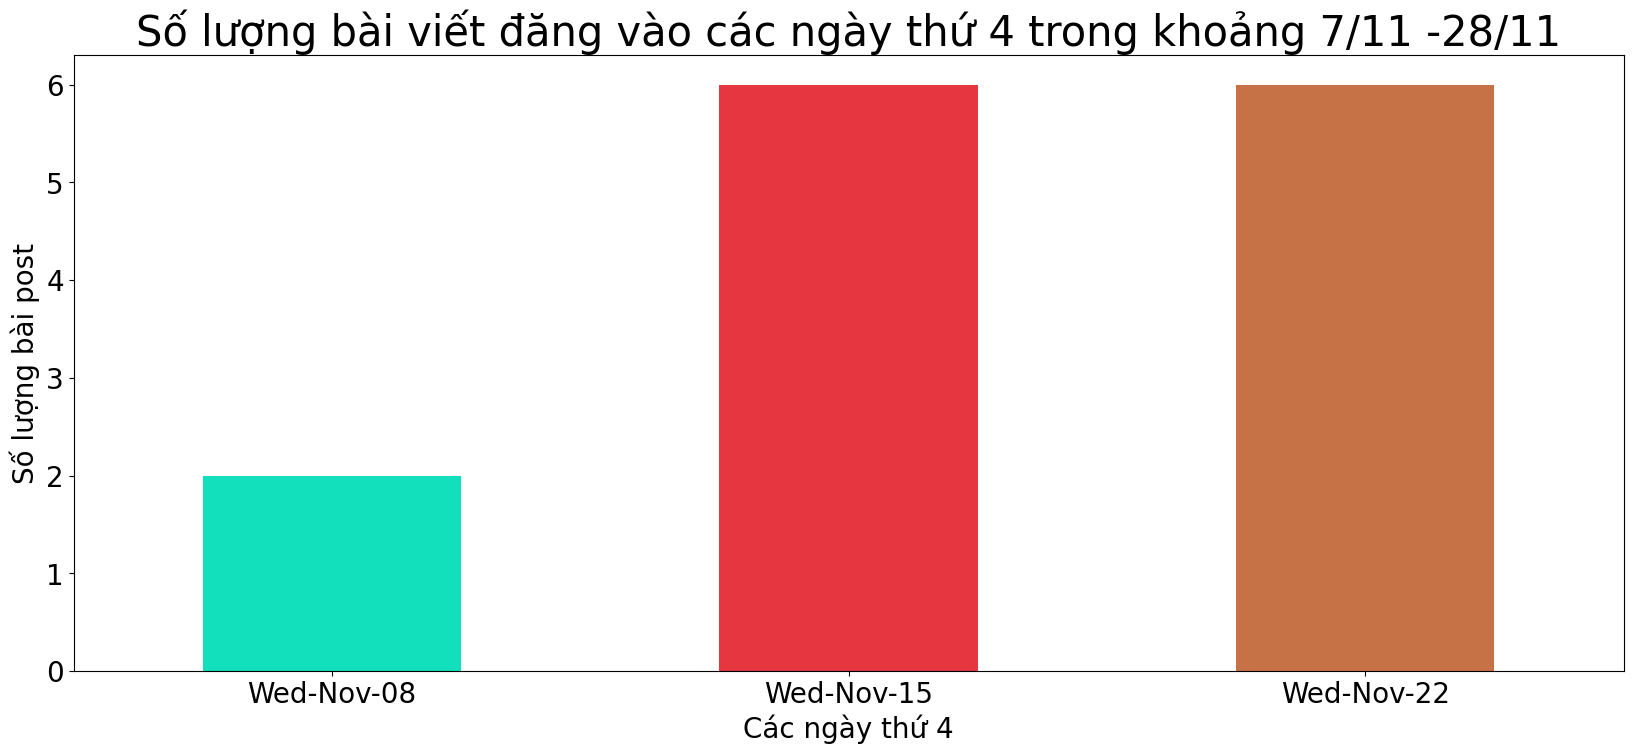

In [188]:
cac_post_vao_thu_6 = df[df['time'].dt.strftime('%a') == 'Wed']
cac_post_vao_thu_6['time'].dt.strftime('%a-%b-%d').value_counts().sort_values(ascending=True).plot(kind='bar',figsize=(20,8),color=random_color)
plt.title("Số lượng bài viết đăng vào các ngày thứ 4 trong khoảng 7/11 -28/11",size=30)
plt.xlabel("Các ngày thứ 4",size=20)
plt.ylabel("Số lượng bài post",size=20)
plt.xticks(rotation = 0,size=20)
plt.yticks(size=20)

Tên của bộ anime được đăng vào ngày 8/11?

In [189]:
df[df['time'].dt.day == 8]

post_text                time  \
1            Như này thì cần gì phải ăn sáng :)))) 2023-11-08 19:14:04   
2  💔\n\n🎥: Mộ đom đóm\n\n💔\n\n🎥: Tomb of Fireflies 2023-11-08 21:00:23   

                                    image_lowquality  likes  comments  shares  \
1  https://scontent.fhan17-1.fna.fbcdn.net/v/t39....  15000       397     503   
2  https://scontent.fhan17-1.fna.fbcdn.net/v/t39....   3300        59      17   

                                            post_url        reactions  \
1  https://facebook.com/AnimeMyHeart/posts/738973...  {'like': 15000}   
2  https://facebook.com/AnimeMyHeart/posts/739020...   {'like': 3300}   

   reaction_count  post_ID  
1           15000        2  
2            3300        3

Từ đây sẽ thấy được post có post_ID 2 và 3 được đăng vào ngày 8/11. Giờ thì plot image để xem nội dung post là gì?

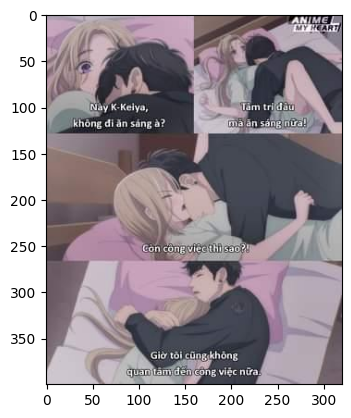

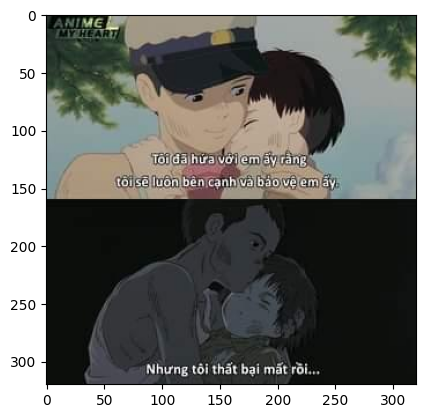

In [198]:
img1 = Image.open('../ImageClassification/Save_Img/2.jpg')
img2 = Image.open('../ImageClassification/Save_Img/3.jpg')
plt.imshow(img1)
plt.show()
plt.imshow(img2)

Các post được đăng nhiều nhất vào khoảng thời gian nào?

<Axes: title={'center': 'Phân bố thời gian đăng bài viết qua từng ngày'}, xlabel='ngày đăng bài', ylabel='Thời gian đăng bài (h)'>

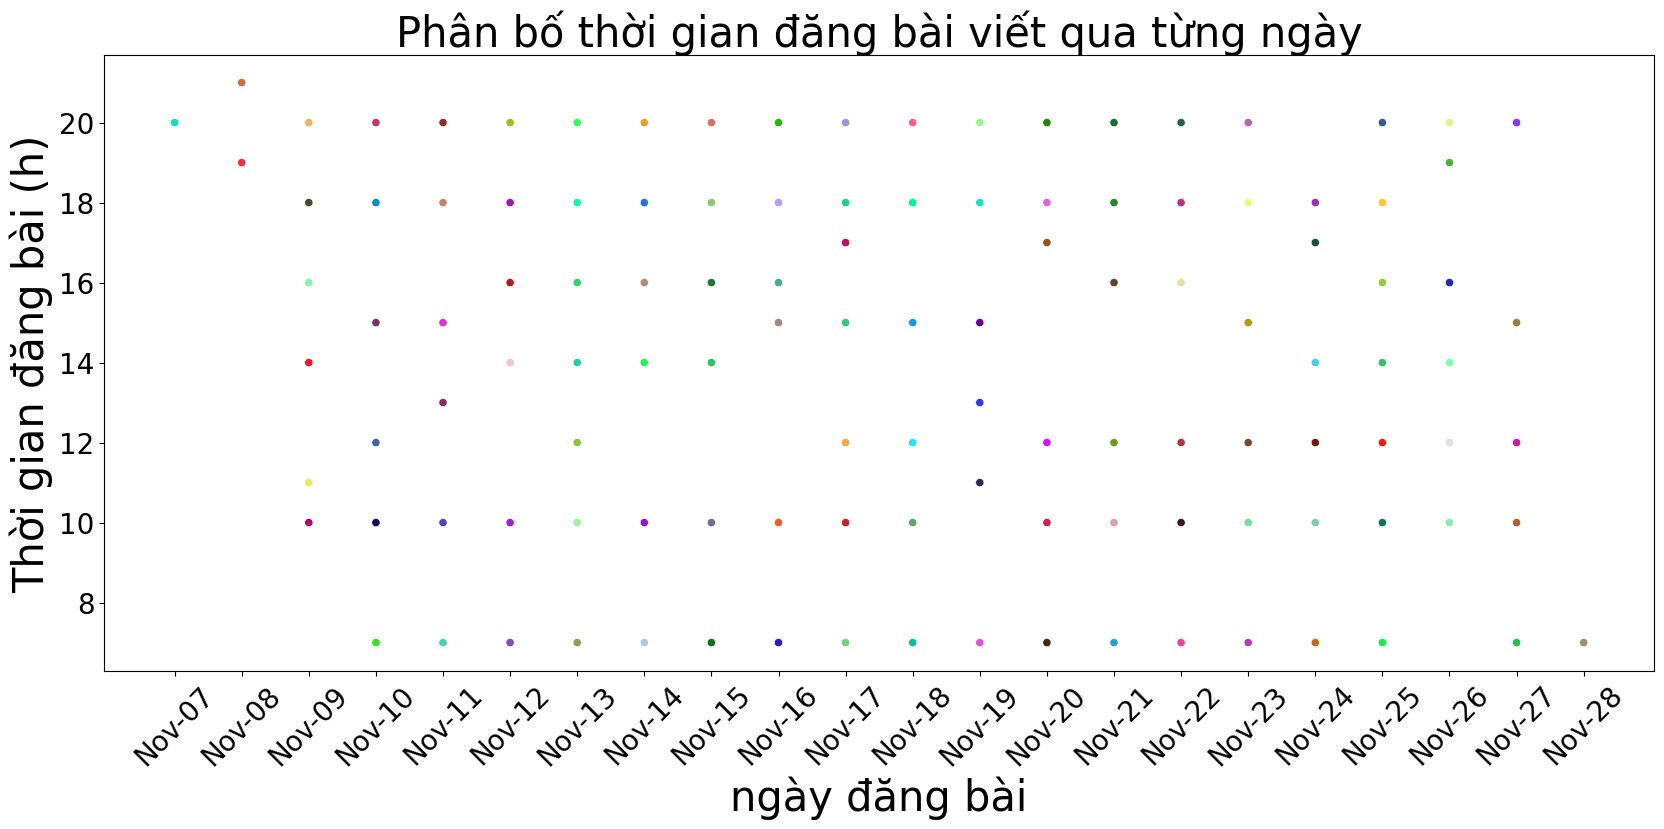

In [199]:
df['date'] = pd.to_datetime(df['time'])
plt.figure(figsize=(20,8))
plt.title("Phân bố thời gian đăng bài viết qua từng ngày",size=30)
plt.xlabel("ngày đăng bài",size=30)
plt.ylabel("Thời gian đăng bài (h)",size=30)
plt.xticks(rotation=45,size=20)
plt.yticks(size=20)


sns.scatterplot(x=df['date'].dt.strftime('%b-%d'),y=df['date'].dt.hour,color=random_color)

In [233]:
#! thời gian mà đăng bài nhiều nhất trong khoảng 7/11 - 28/11
df['date'].dt.hour.sort_values(ascending=True).value_counts(sort=False)

date
7     18
10    18
11     2
12    12
13     2
14     8
15     8
16    10
17     3
18    17
19     2
20    19
21     1
Name: count, dtype: int64

Những bài viết nào được đăng vào khoảng trên 8h tối trong bộ dữ liệu? 

In [201]:
df[df['time'].dt.hour >= 20].shape[0]

20

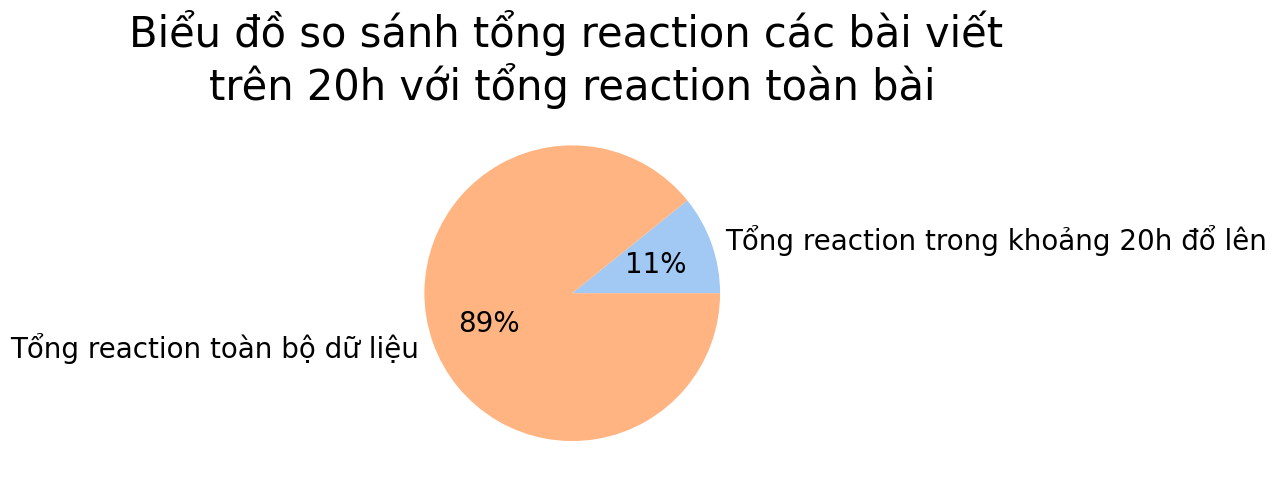

In [202]:
#! reaction của những bài viết này chiếm ? % reaction toàn bộ dữ liệu? Vẽ pie plot
colors = sns.color_palette('pastel')[0:5]
data = [df[df['time'].dt.hour >= 20]['reaction_count'].sum(),df['reaction_count'].sum()]
labels = ['Tổng reaction trong khoảng 20h đổ lên', 'Tổng reaction toàn bộ dữ liệu']
plt.title("Biểu đồ so sánh tổng reaction các bài viết \ntrên 20h với tổng reaction toàn bài",size=30)
plt.pie(data, labels = labels, colors = colors, autopct='%.0f%%',textprops={'fontsize': 20})
plt.show()

Số lượt tương tác trong bài viết thay đổi thế nào?


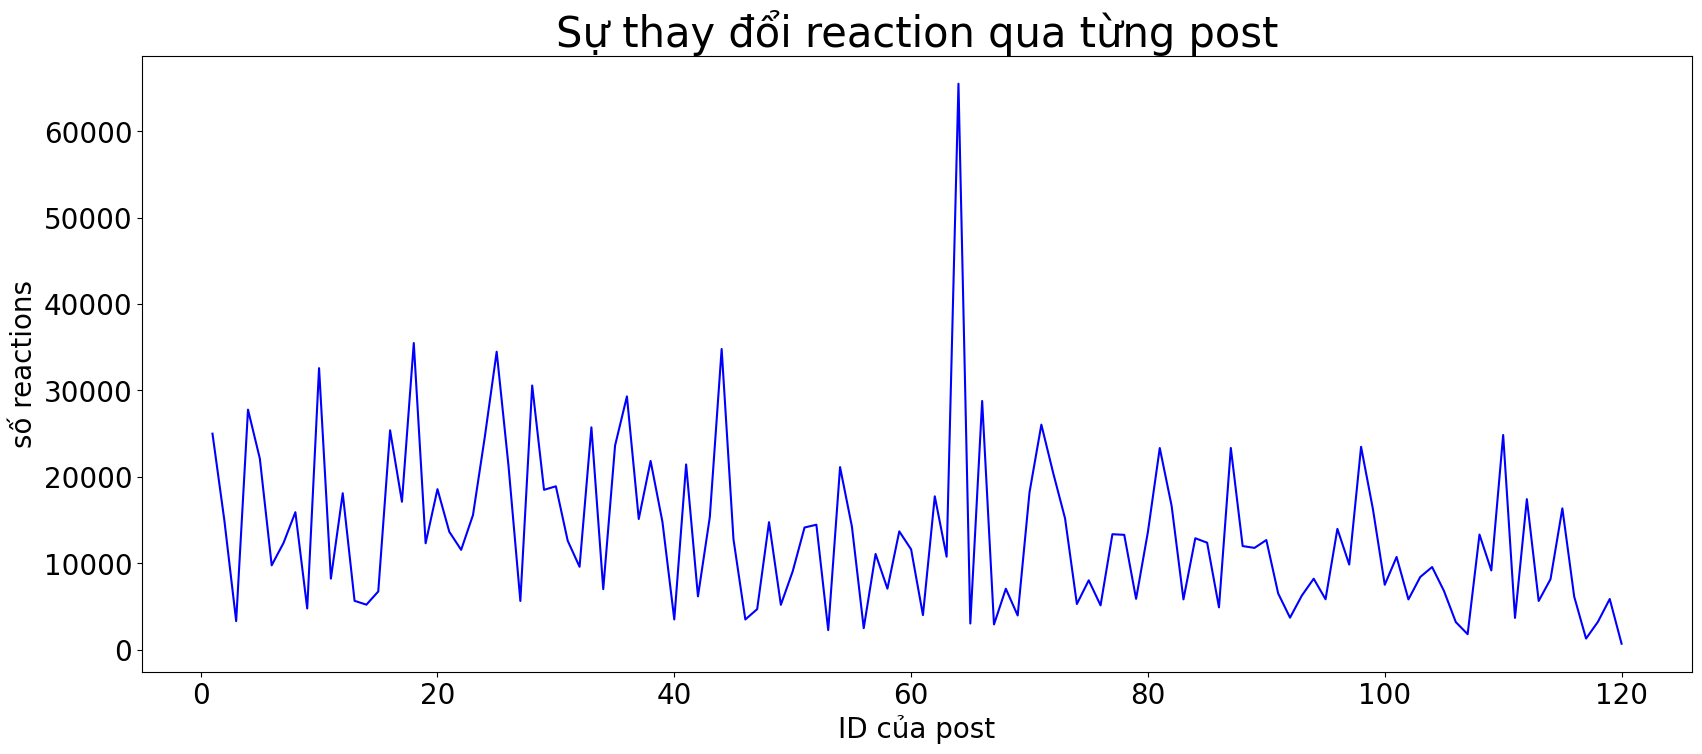

In [203]:
plt.figure(figsize=(20,8))
plt.title("Sự thay đổi reaction qua từng post", size=30)
plt.xticks(size=20)
plt.yticks(size=20)
plt.xlabel("ID của post",size=20)
plt.ylabel("số reactions",size=20)
plt.plot(df['post_ID'],df['reaction_count'],color='blue')

Phân bố reaction trong toàn bộ dữ liệu

Tại đây bắt đấu sử dụng total reactions

In [204]:
Total_reactions.head(3)

post_ID   like  love  haha  wow  care  sad  angry  share  comment
0        1  25000     0     0    0     0    0      0    454      945
1        2  15000     0     0    0     0    0      0    503      397
2        3   3300     0     0    0     0    0      0     17       59

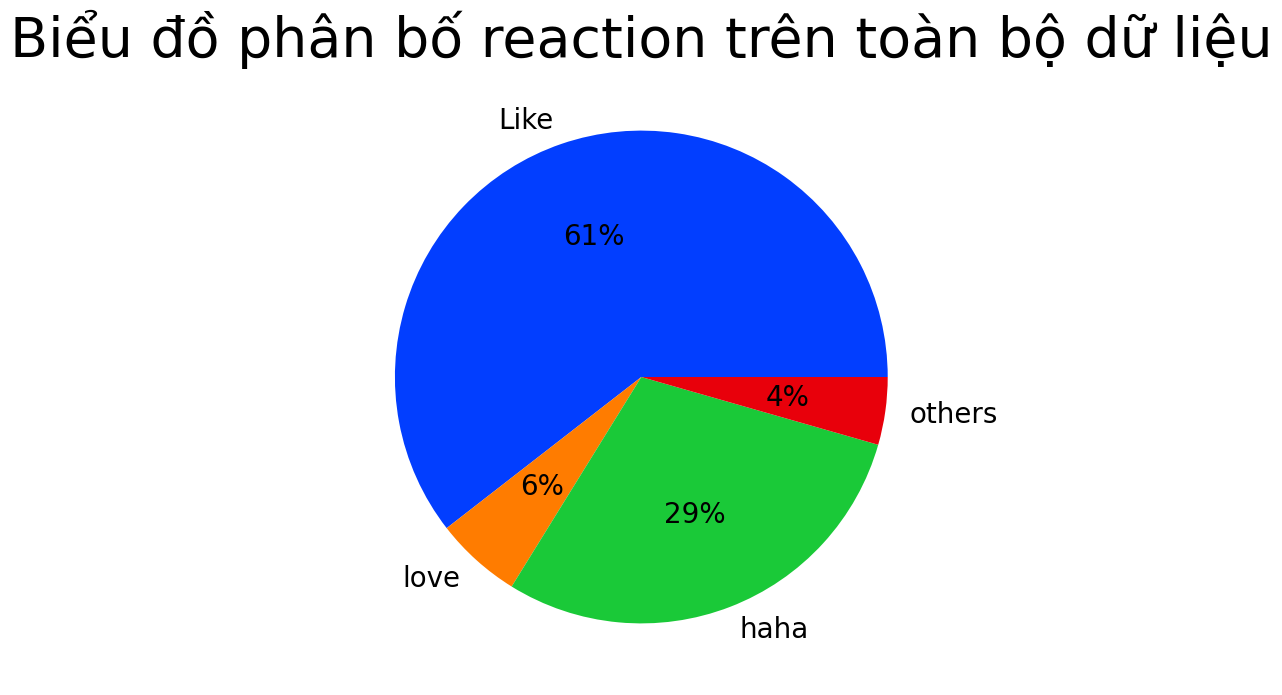

In [206]:
#! reaction của những bài viết này chiếm ? % reaction toàn bộ dữ liệu? Vẽ pie plot
colors = sns.color_palette('bright')[0:5]
data = [Total_reactions['like'].sum(),Total_reactions['love'].sum(),Total_reactions['haha'].sum(),Total_reactions['wow'].sum()+Total_reactions['care'].sum()+Total_reactions['sad'].sum()+Total_reactions['angry'].sum()]
labels = ['Like','love','haha','others']
plt.figure(figsize=(20,8))
plt.title("Biểu đồ phân bố reaction trên toàn bộ dữ liệu",size=40)
plt.pie(data, labels = labels, colors = colors, autopct='%.0f%%',textprops={'fontsize': 20})
plt.show()

Tương quan giữa số lượng reactions và độ dài bài viết?

Tổng quan tất cả các reactions của các post từ 7/11 - 28/11

(array([    0.,  2000.,  4000.,  6000.,  8000., 10000.]),
 [Text(0, 0.0, '0'),
  Text(0, 2000.0, '2000'),
  Text(0, 4000.0, '4000'),
  Text(0, 6000.0, '6000'),
  Text(0, 8000.0, '8000'),
  Text(0, 10000.0, '10000')])

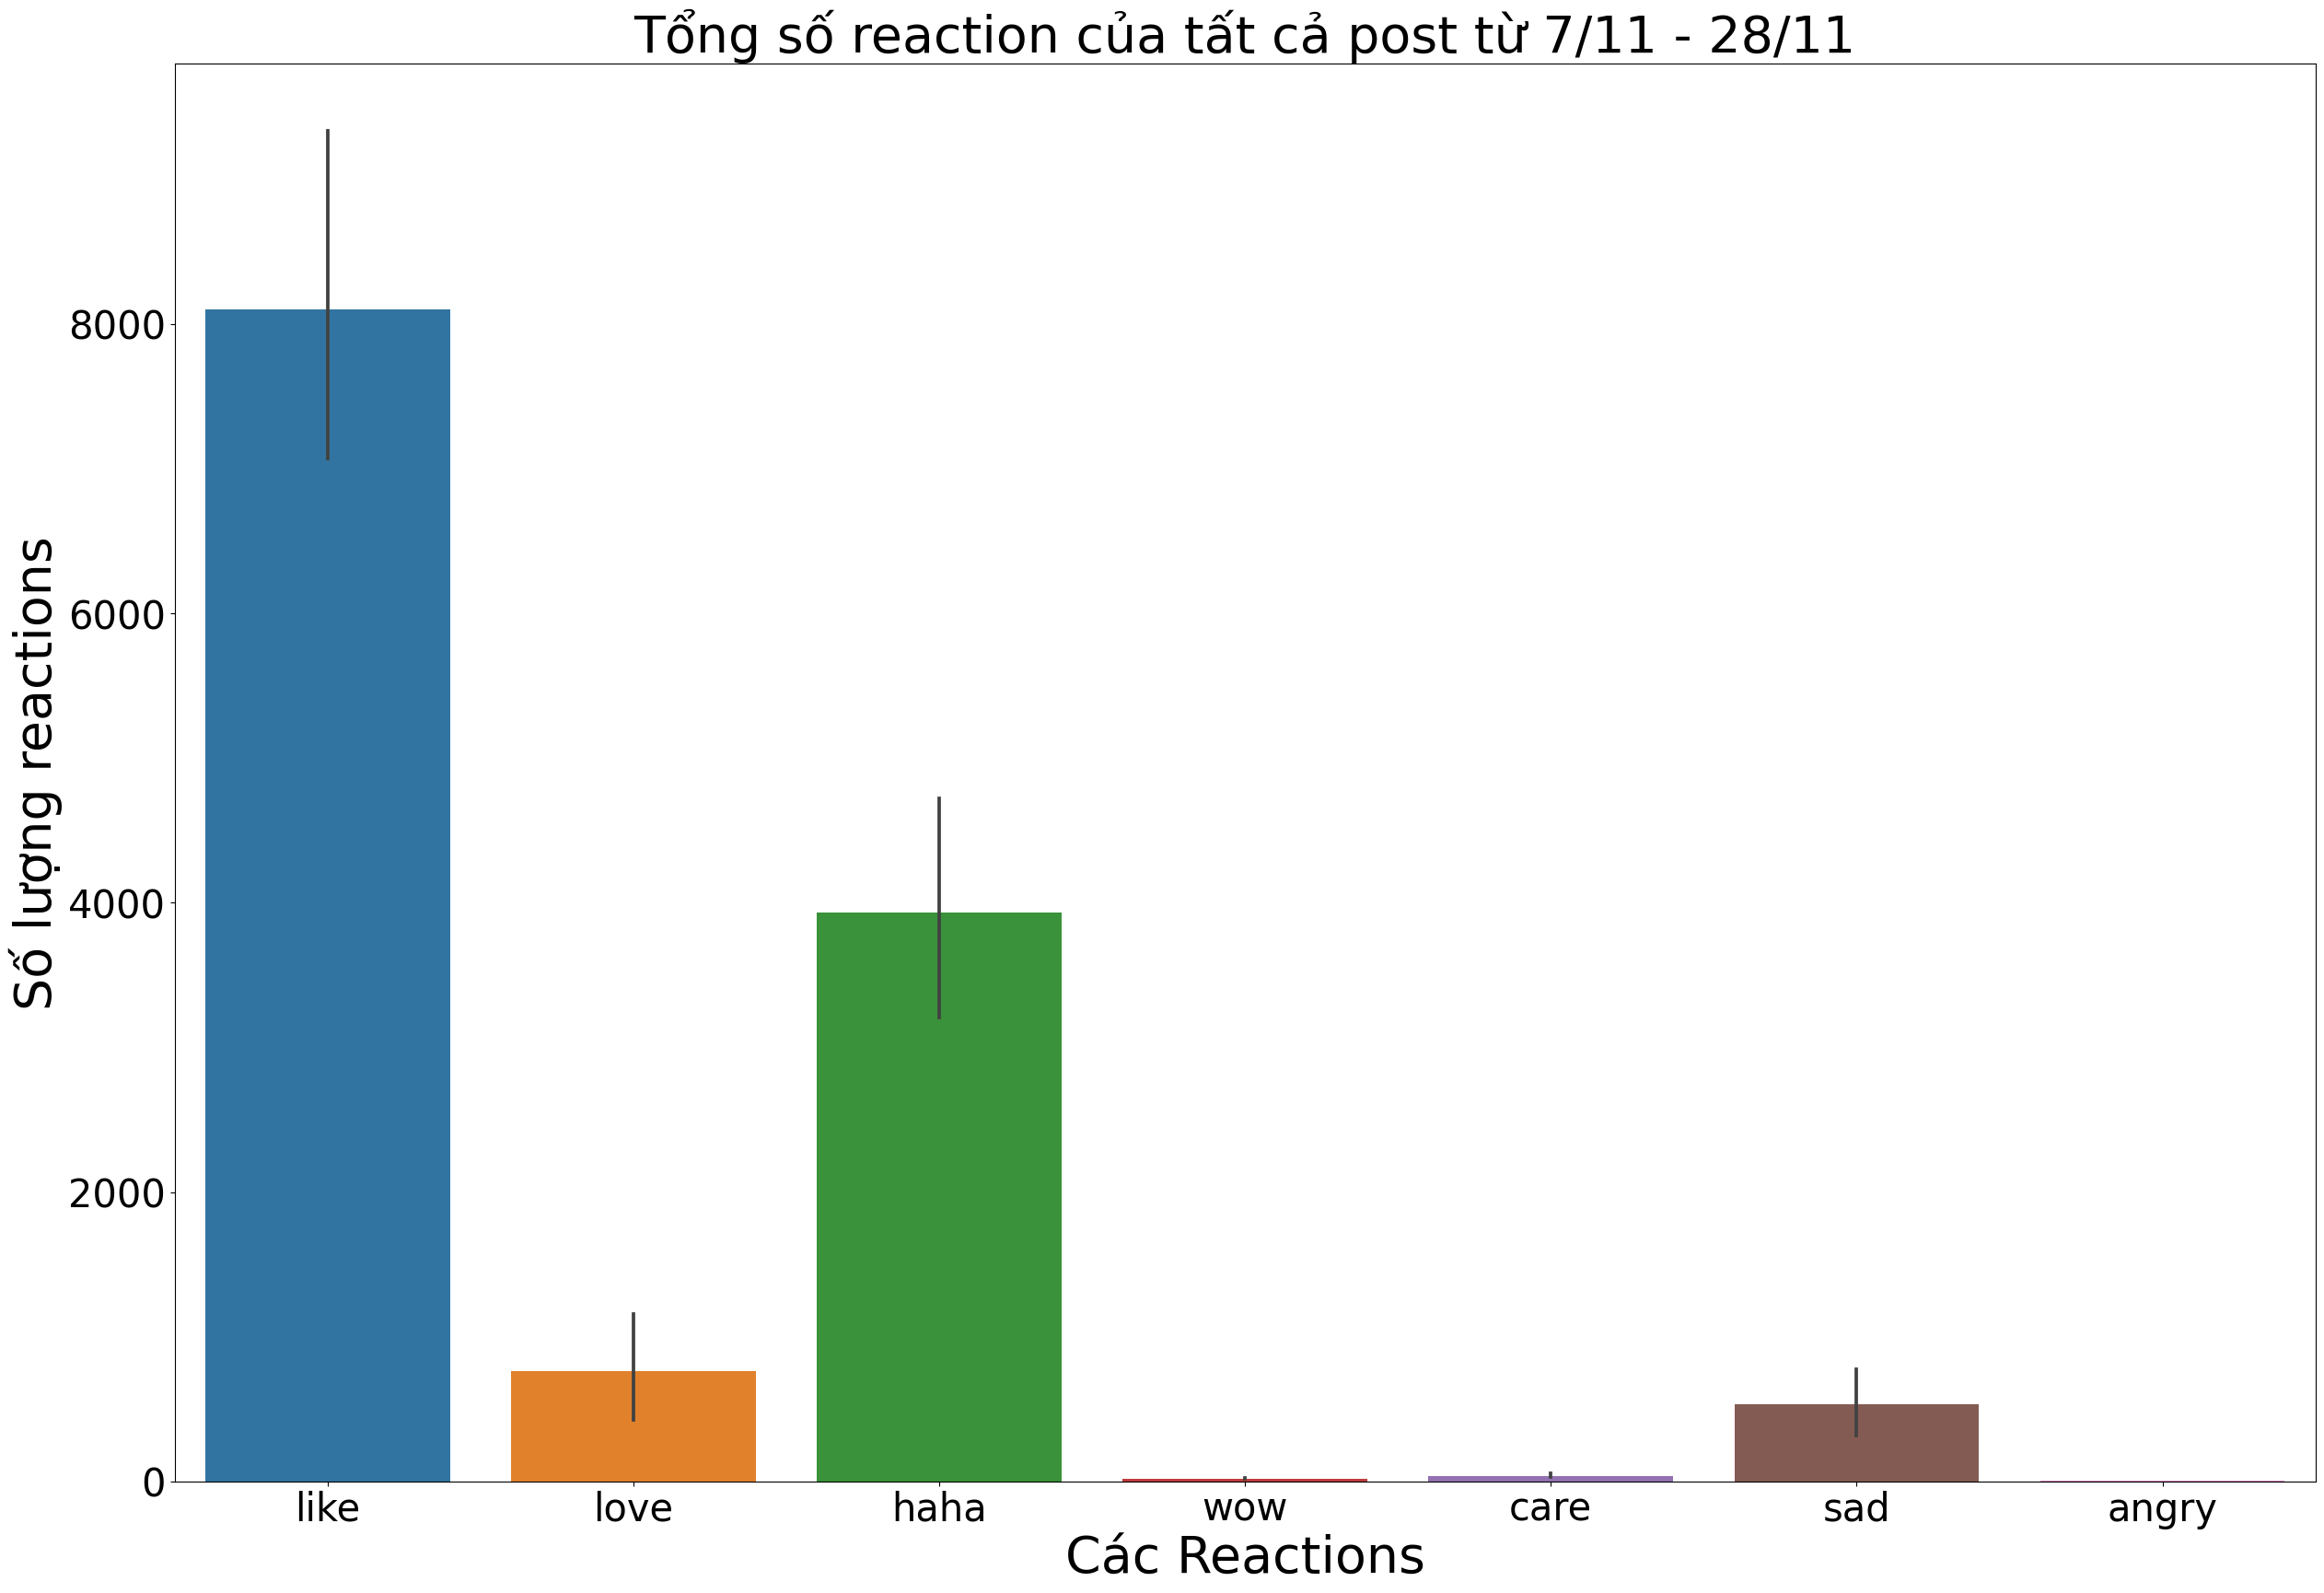

In [208]:
ax = sns.barplot(data=Total_reactions[['like','love','haha','wow','care','sad','angry']])
ax.figure.set_size_inches(30,20)
plt.title("Tổng số reaction của tất cả post từ 7/11 - 28/11",size=40)
plt.ylabel("Số lượng reactions",size=40)
plt.xlabel("Các Reactions",size=40)
plt.xticks(size=30)
plt.yticks(size=30)

Text(0, 0.5, 'Số lượng post')

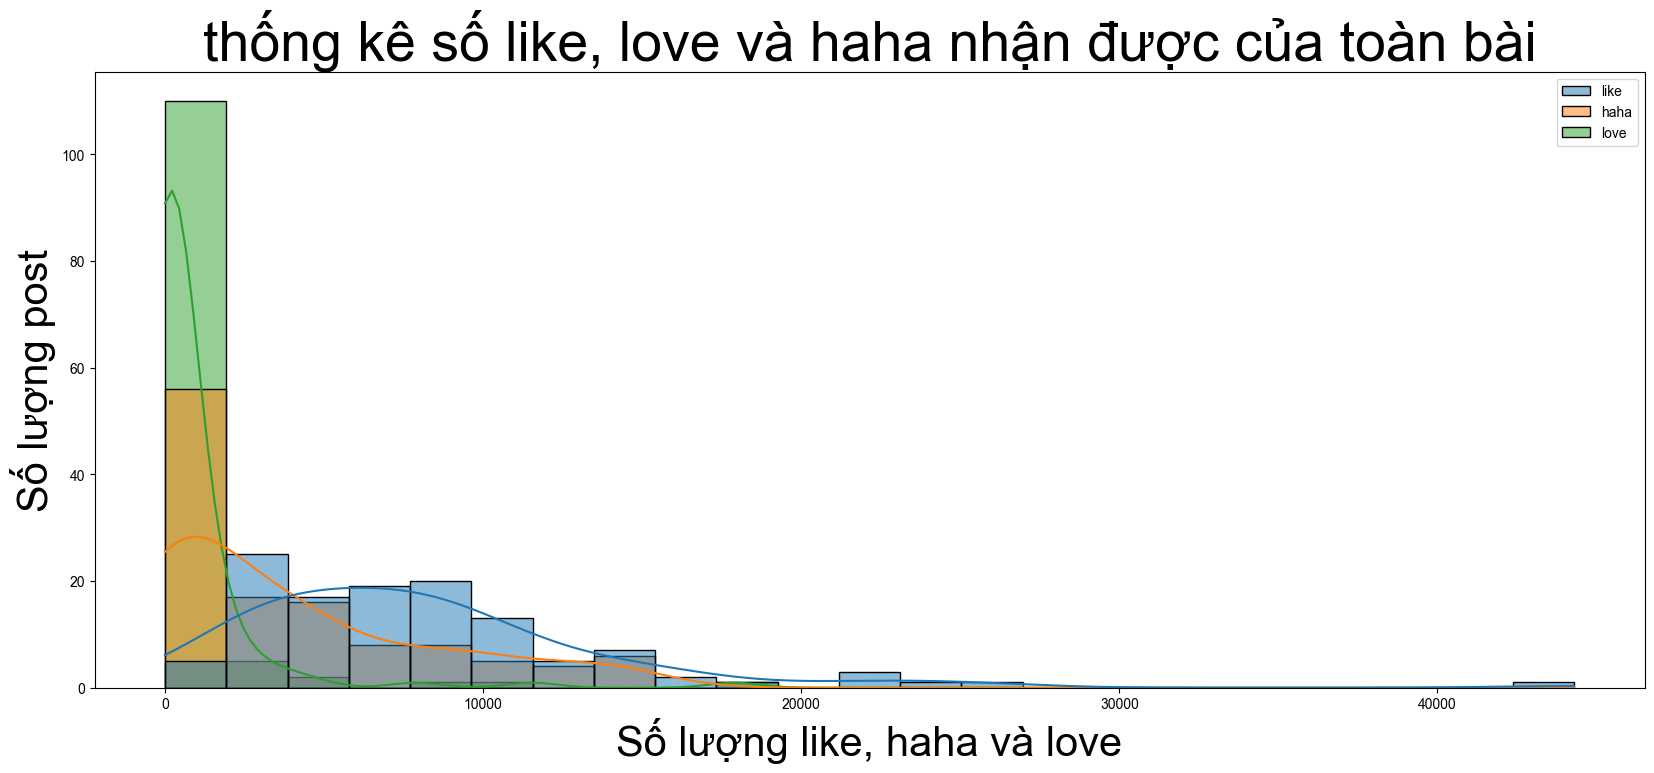

In [210]:
fig, ax = plt.subplots(figsize=(20,8))
sns.histplot(data=Total_reactions[['like','haha','love']],kde=True,ax=ax)
sns.set(font_scale=1) 
plt.title("thống kê số like, love và haha nhận được của toàn bài",size=40)
plt.xlabel("Số lượng like, haha và love",size=30)
plt.ylabel("Số lượng post",size=30)

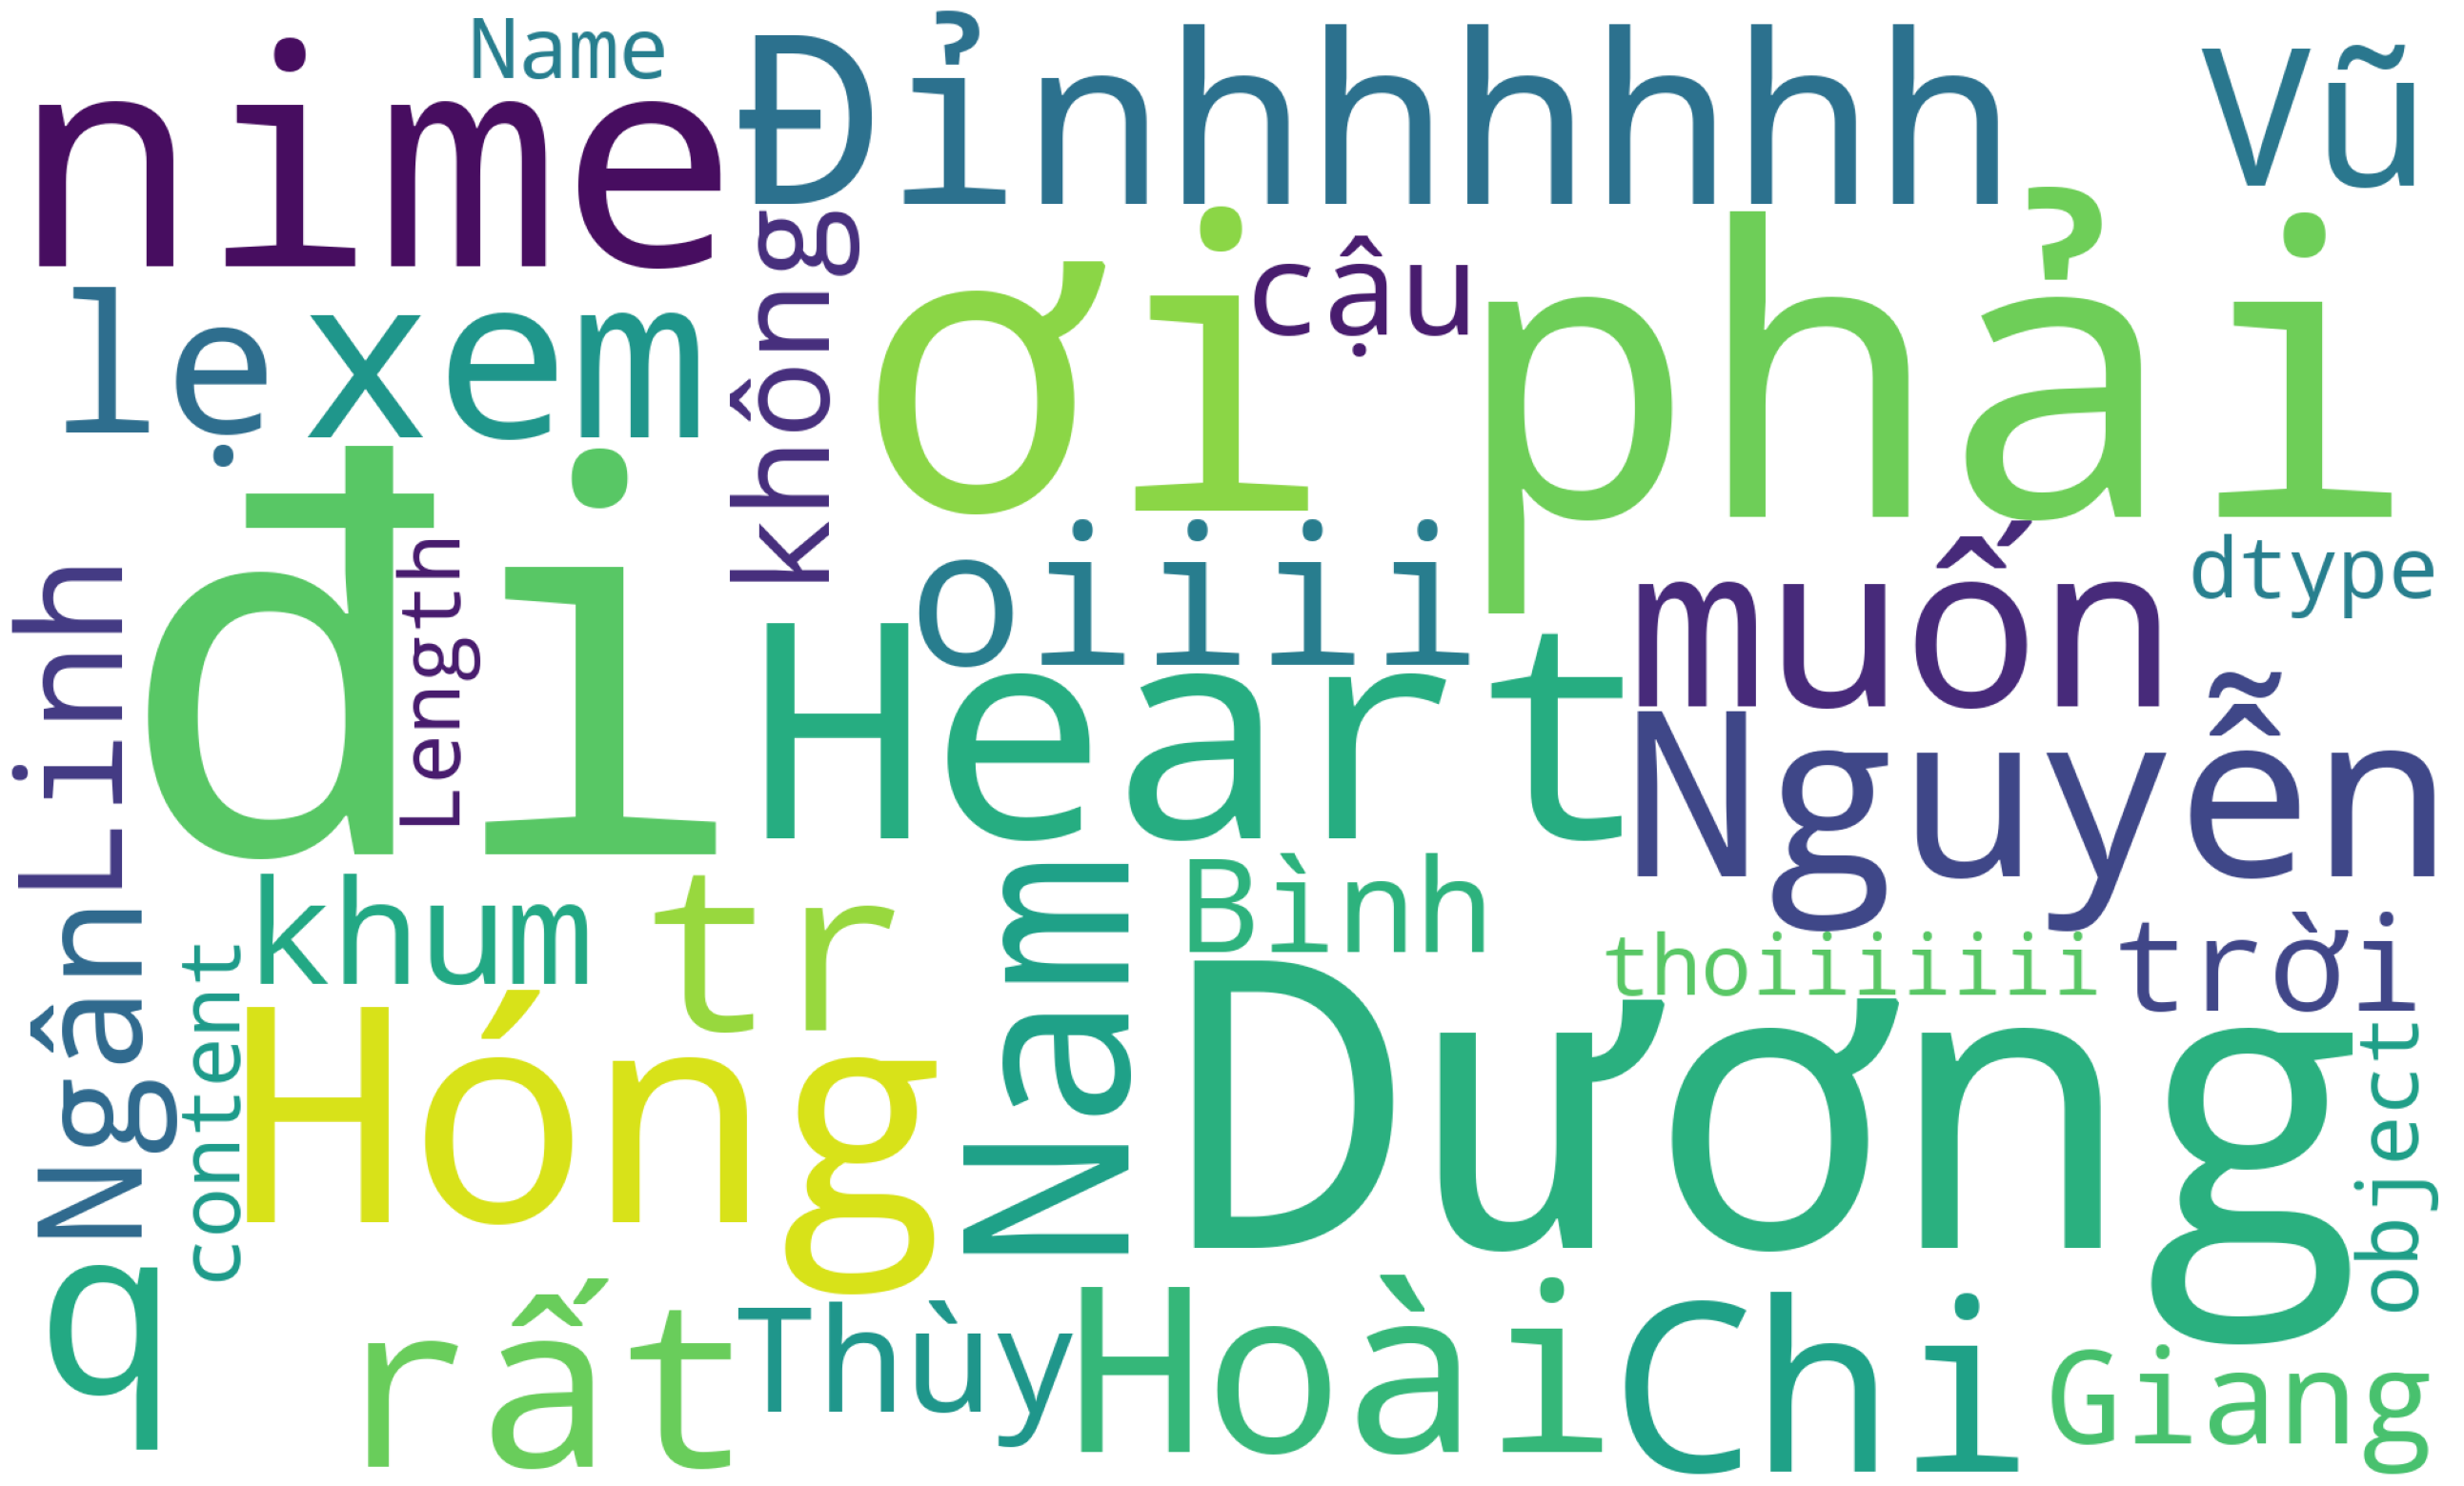

In [211]:
from wordcloud import WordCloud, STOPWORDS
my_comment_from_max_comment_post = pd.read_csv('./My_Raw_Data/my_user_and_comment.csv')
wordcloud = WordCloud(stopwords=STOPWORDS,
                          background_color='white', 
                      max_words=300,
                      width=2000, height=1200
                         ).generate(str(my_comment_from_max_comment_post['content']))
plt.figure(figsize=(40,20))
plt.clf()
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

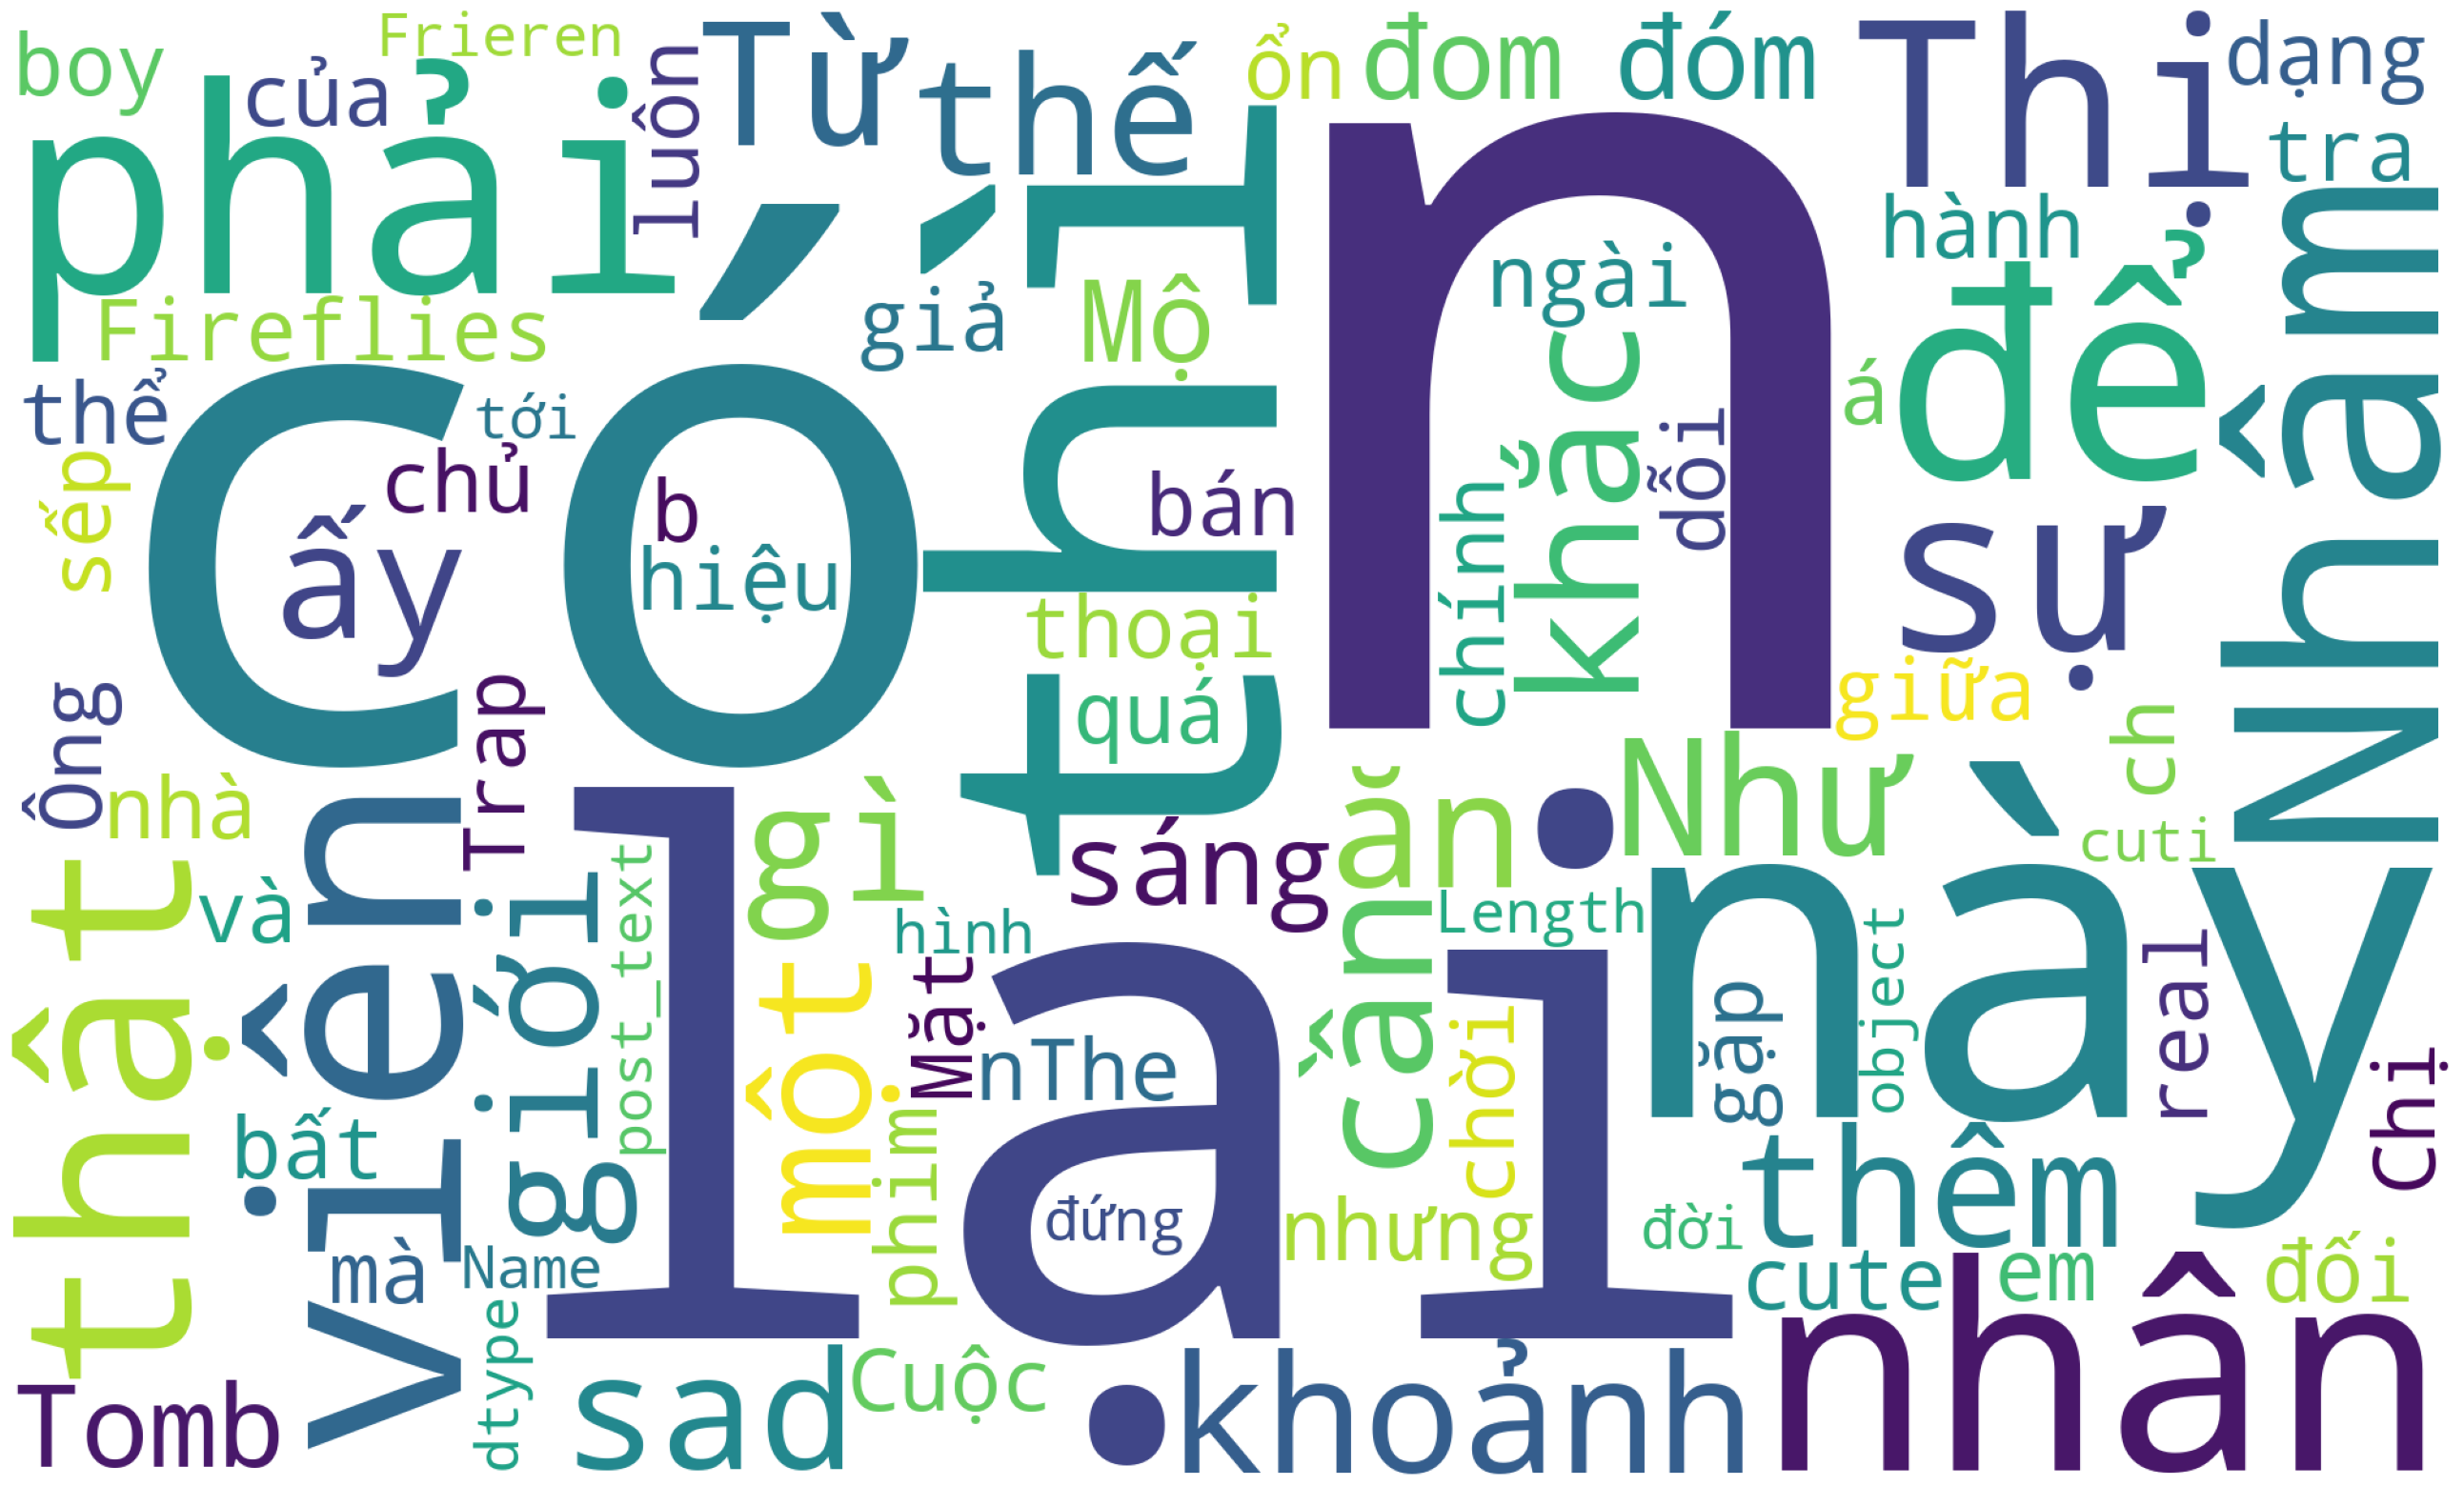

In [212]:
from wordcloud import WordCloud, STOPWORDS

wordcloud = WordCloud(stopwords=STOPWORDS,
                          background_color='white', 
                      max_words=300,
                      width=2000, height=1200
                         ).generate(str(df['post_text']))
plt.figure(figsize=(40,20))
plt.clf()
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

Phân tích cảm xúc của bài post có nhiều cmt và share nhất:

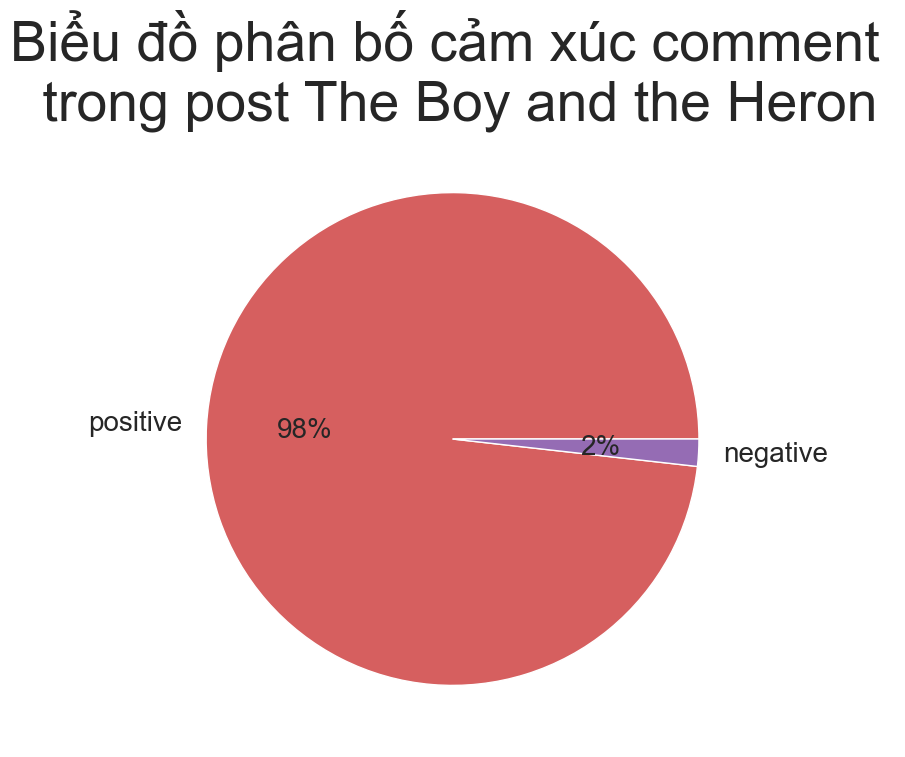

In [213]:
my_comment_from_max_comment_post_labeled = pd.read_csv('./My_Raw_Data/my_user_and_comment_labeled.csv')
my_comment_from_max_comment_post_labeled['emotion'].value_counts()#! reaction của những bài viết này chiếm ? % reaction toàn bộ dữ liệu? Vẽ pie plot
colors = sns.color_palette('muted')[3:6]
data = [(my_comment_from_max_comment_post_labeled['emotion']=='p').sum(),(my_comment_from_max_comment_post_labeled['emotion']=='n').sum()]
labels = ['positive','negative']
plt.figure(figsize=(20,8))
plt.title("Biểu đồ phân bố cảm xúc comment \n trong post The Boy and the Heron",size=40)
plt.pie(data, labels = labels, colors = colors, autopct='%.0f%%',textprops={'fontsize': 20})
plt.show()

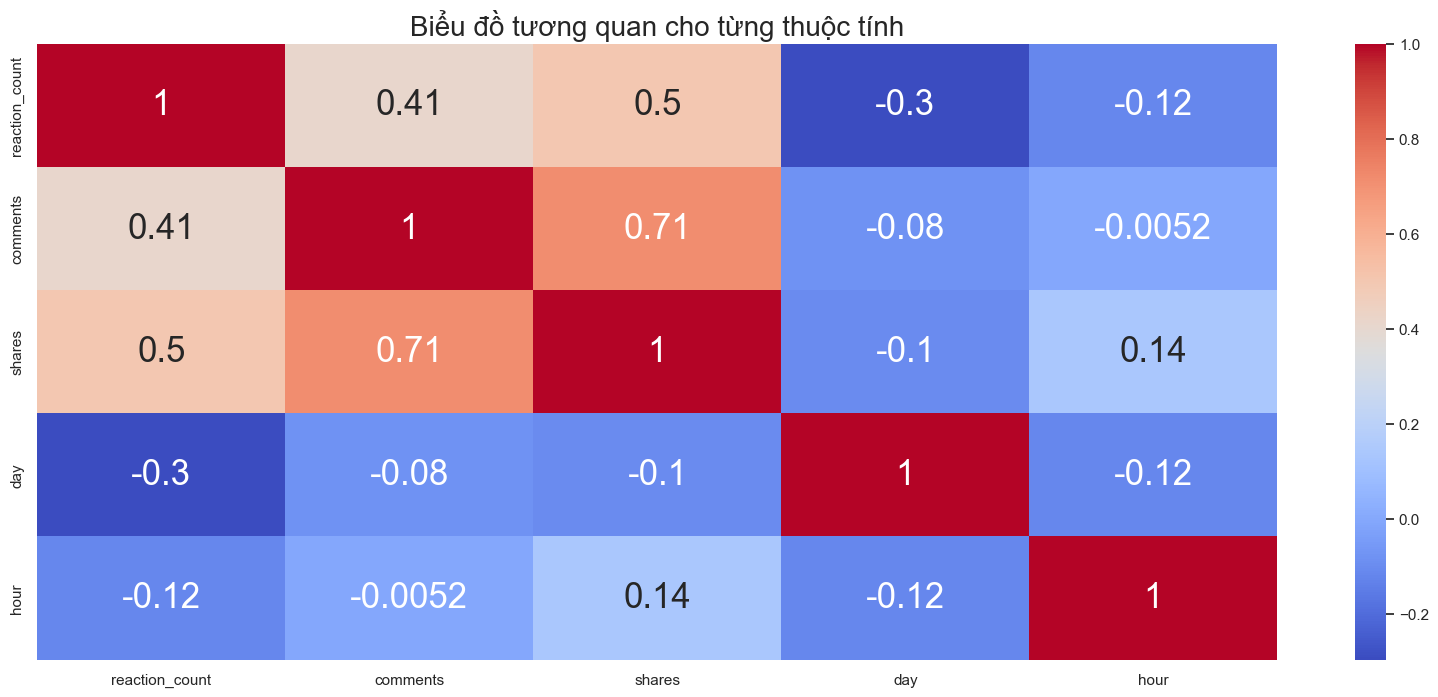

In [214]:
df['day'] = df['date'].dt.day
df['hour'] = df['date'].dt.hour
df['post len'] = len(df['post_text'])
fig, ax = plt.subplots(figsize=(20,8))
plt.title("Biểu đồ tương quan cho từng thuộc tính",size=20)

sns.heatmap(df[['reaction_count','comments','shares','day','hour']].corr(),cmap='coolwarm',annot=True,annot_kws={"fontsize":25},ax=ax)
sns.set(font_scale=2) # font size 2

<Axes: title={'center': 'Biểu đồ sự tương quan giữa các giá trị trong reactions với nhau'}>

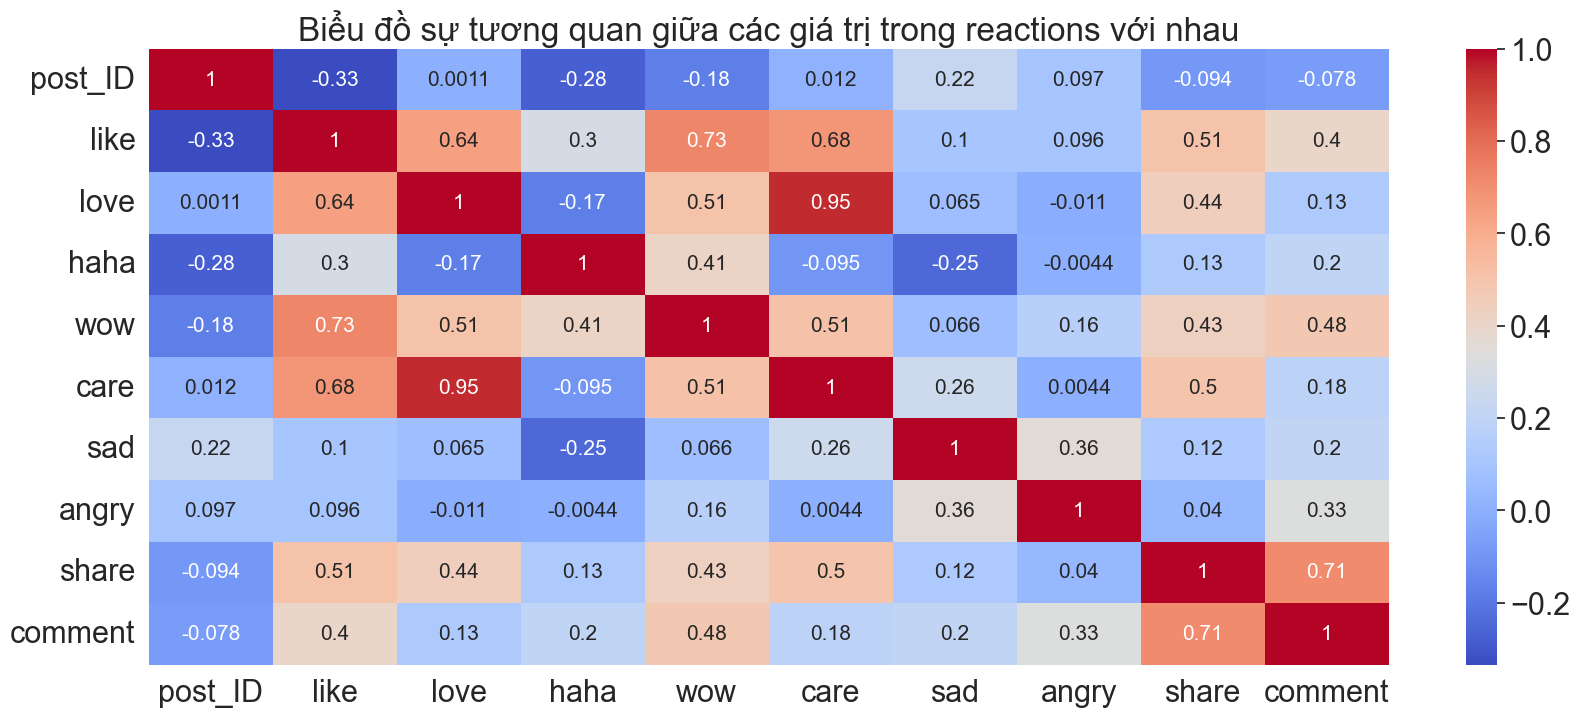

In [215]:
fig, ax = plt.subplots(figsize=(20,8))
plt.title("Biểu đồ sự tương quan giữa các giá trị trong reactions với nhau")
sns.heatmap(Total_reactions.corr(),cmap='coolwarm',annot=True,ax=ax,annot_kws={"fontsize":15})

Một cái nhìn khác để đánh giá sự tương quan giữa các trường trong reactions

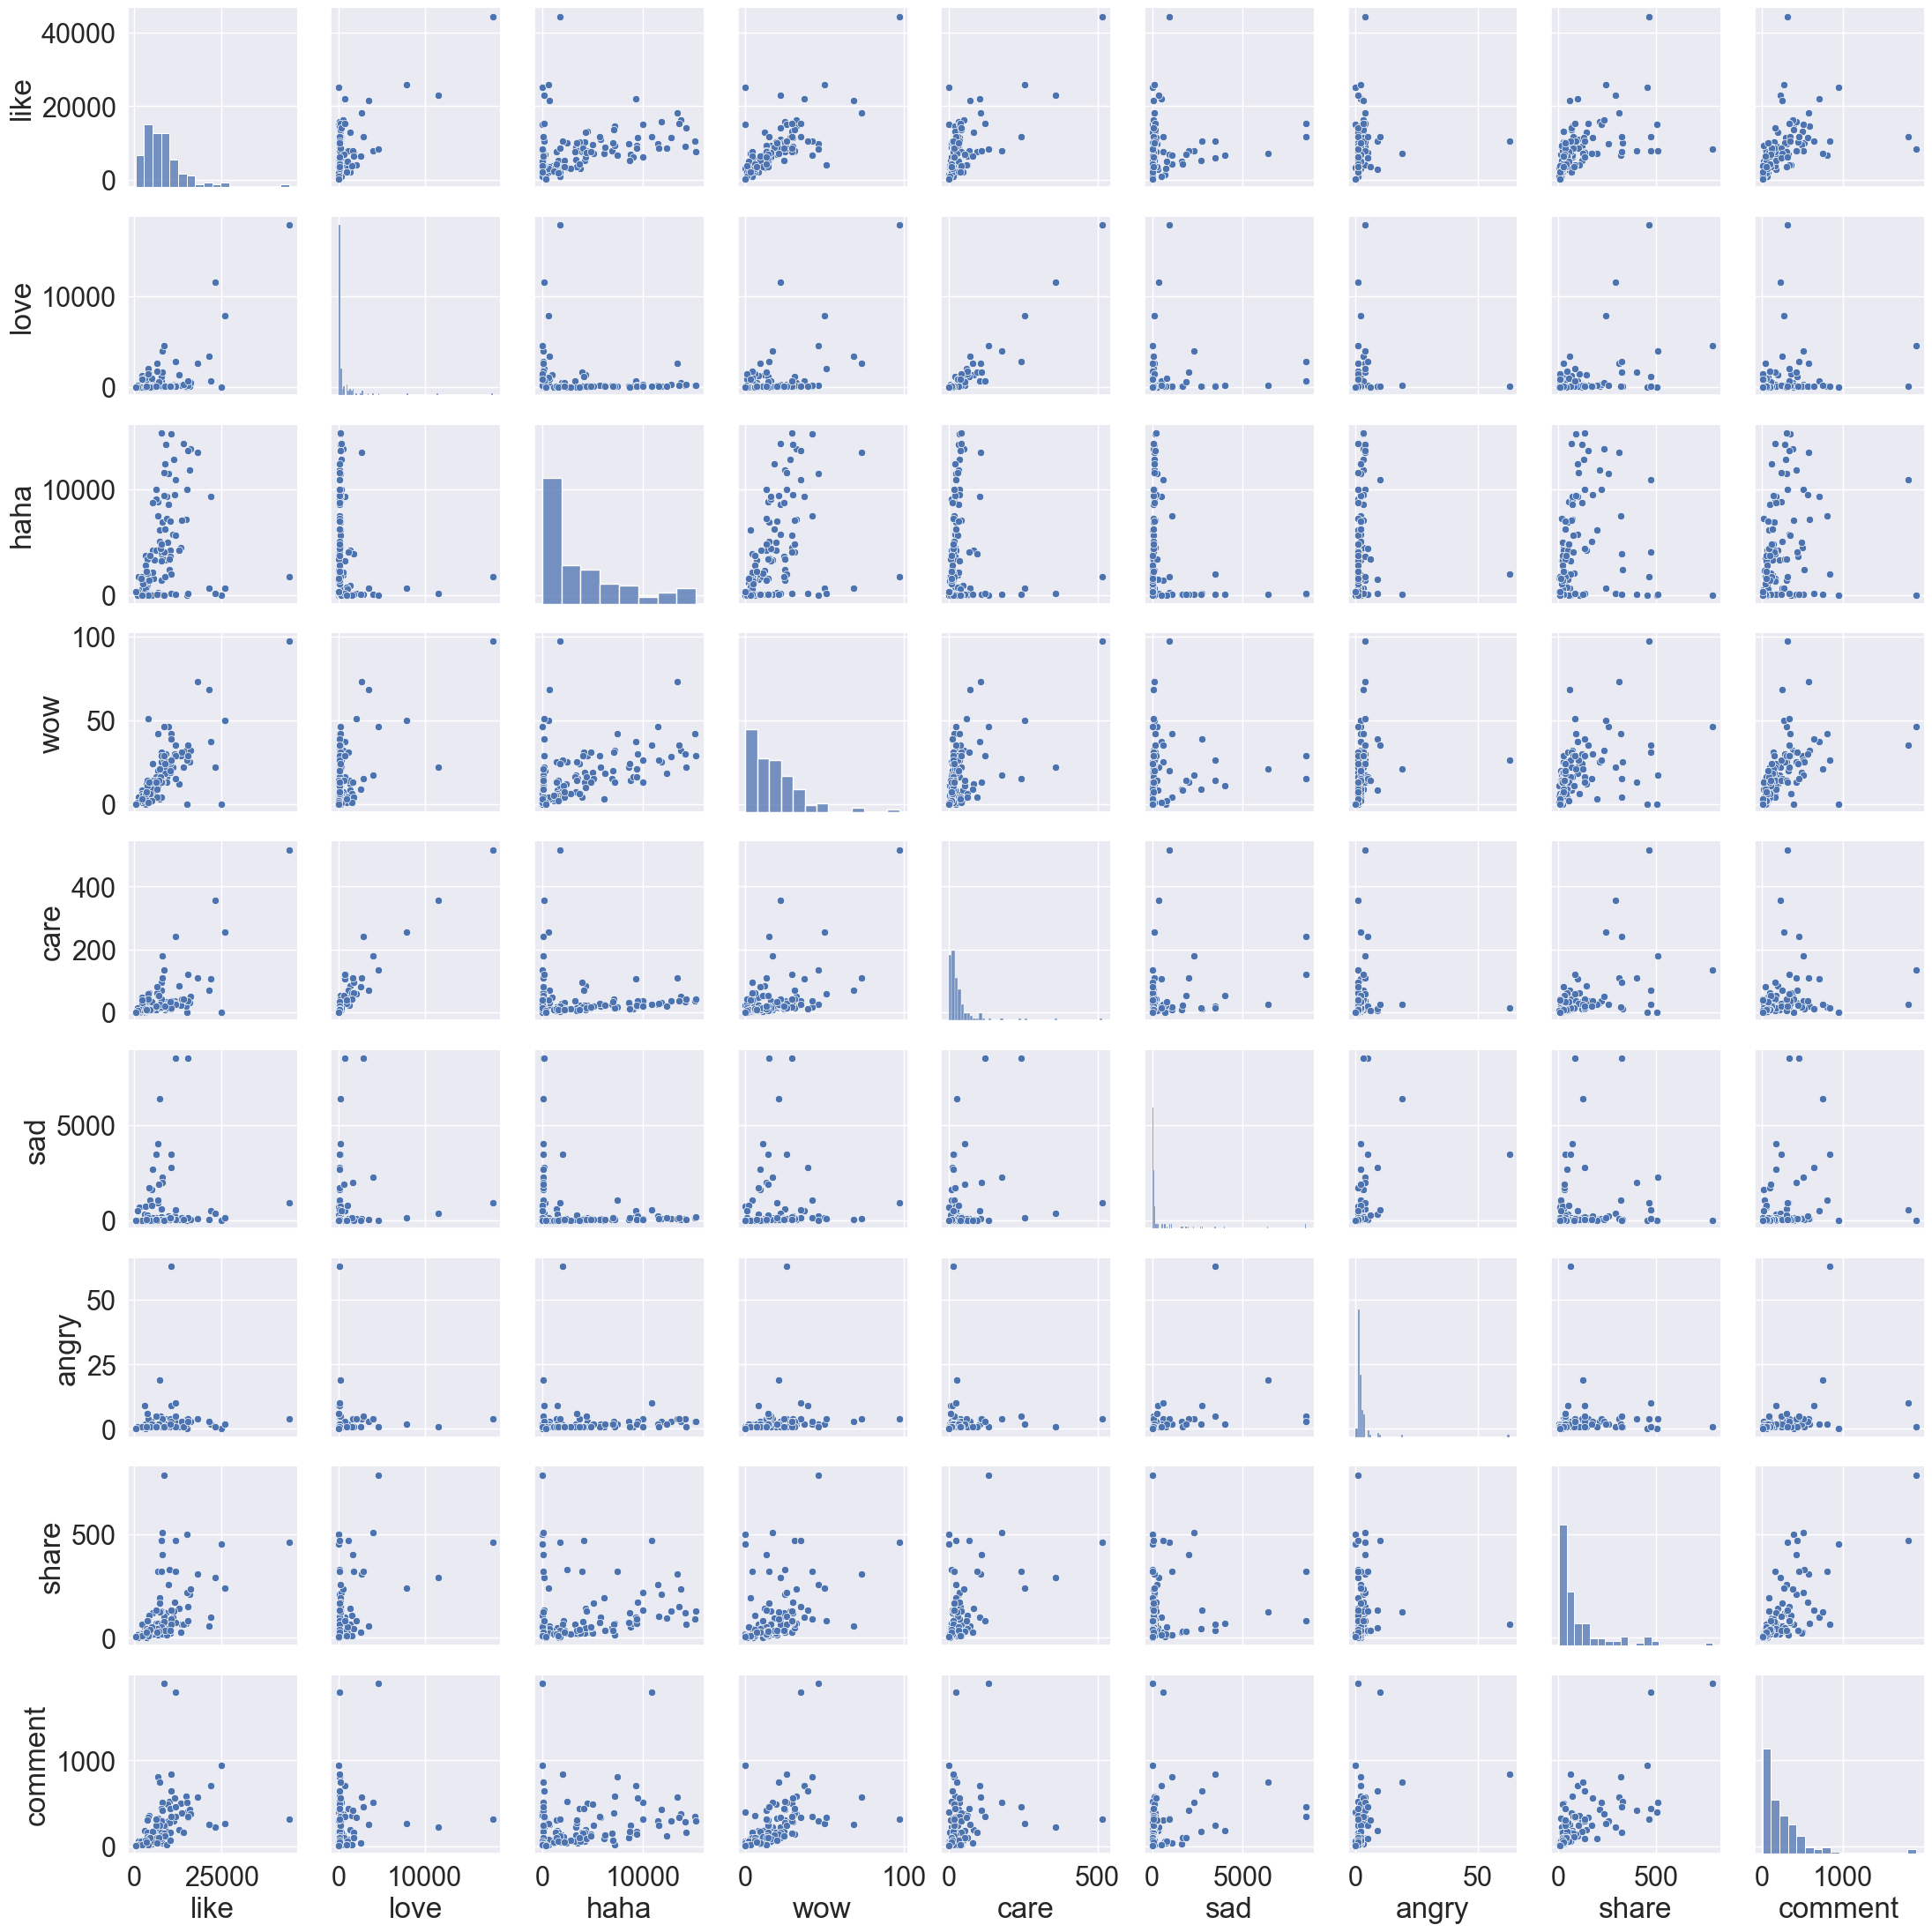

In [216]:
ax = sns.pairplot(data=Total_reactions[['like','love','haha','wow','care','sad','angry','share','comment']])

Text(0.5, 0.98, 'Biểu đồ tương tác giữa wow và comment')

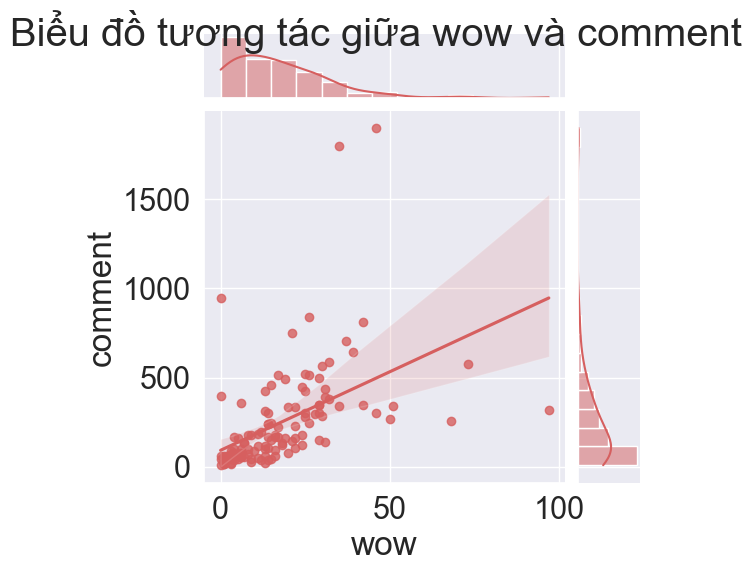

In [217]:
colors = sns.color_palette('muted')[3]
ax = sns.jointplot(data=Total_reactions,x='wow',y='comment',kind='reg',color = colors)

ax.fig.suptitle("Biểu đồ tương tác giữa wow và comment")

Text(0.5, 0.98, 'Biểu đồ tương tác giữa wow và like')

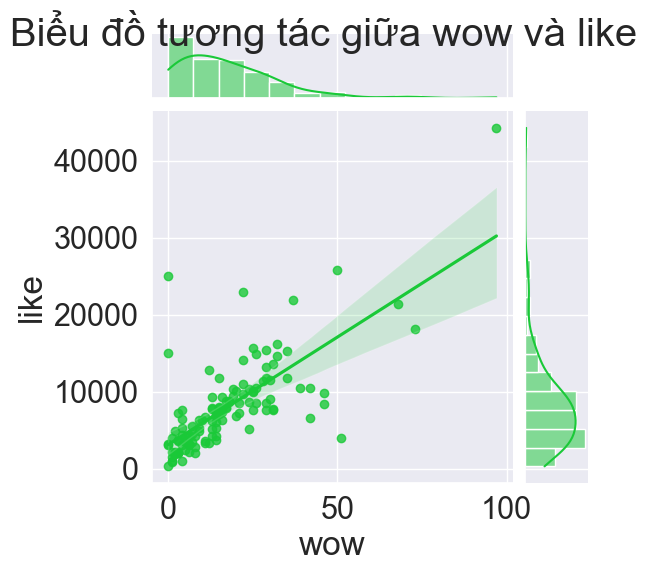

In [218]:
colors = sns.color_palette('bright')[2]
ax = sns.jointplot(data=Total_reactions,x='wow',y='like',kind='reg',color = colors)

ax.fig.suptitle("Biểu đồ tương tác giữa wow và like")

Text(0.5, 0.98, 'Biểu đồ tương tác giữa care và love')

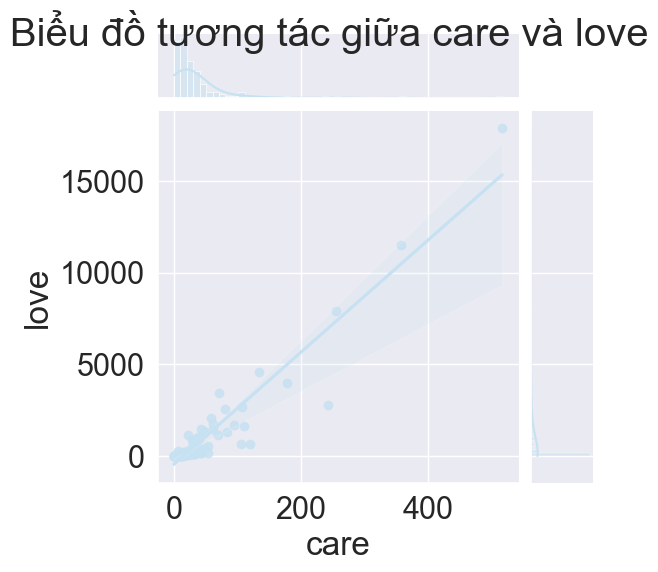

In [219]:
colors = sns.color_palette("cubehelix")[5]
ax = sns.jointplot(data=Total_reactions,x='care',y='love',kind='reg',color = colors)

ax.fig.suptitle("Biểu đồ tương tác giữa care và love")

C:\Users\ASUS\AppData\Roaming\Python\Python311\site-packages\seaborn\distributions.py:1185: UserWarning: The following kwargs were not used by contour: 'n_level'
  cset = contour_func(


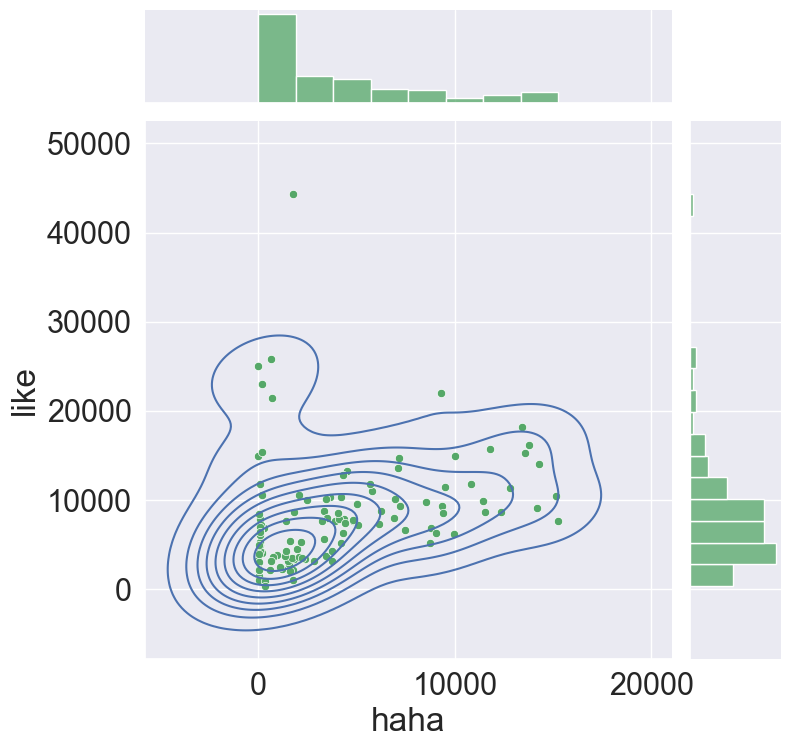

In [220]:
ax = sns.jointplot(data=Total_reactions,x='haha',y='like',height=8,color='g').plot_joint(sns.kdeplot,n_level=10)

Số lượng bình luận mỗi bài viết

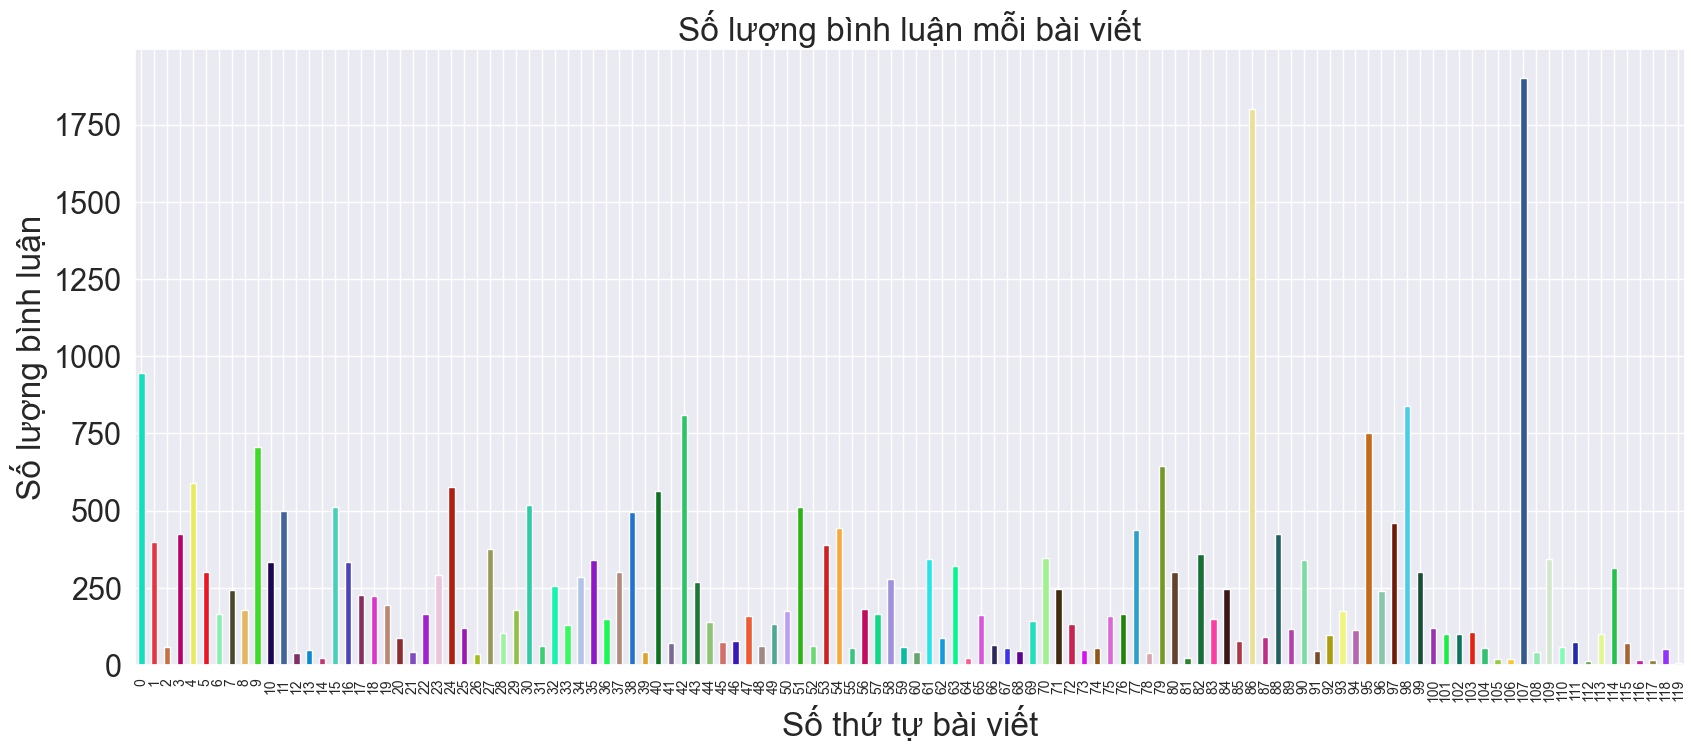

In [221]:
plt.title("Số lượng bình luận mỗi bài viết")
df['comments'].plot(kind='bar',figsize=(20,8),color=random_color)
plt.xticks(rotation=90, size=10)
plt.xlabel("Số thứ tự bài viết")
plt.ylabel("Số lượng bình luận")
plt.show()

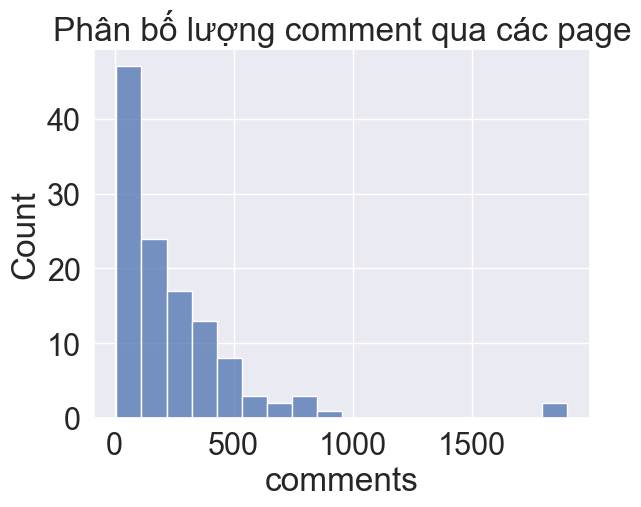

In [222]:
plt.title("Phân bố lượng comment qua các page")
ax = sns.histplot(data=df['comments'])

Độ dài mỗi dòng caption qua từng bài viết:

<Axes: title={'center': 'Biểu đồ phân bố caption len trên toàn bộ dữ liệu'}, xlabel='Số thứ tự post', ylabel='Độ dài caption mỗi post'>

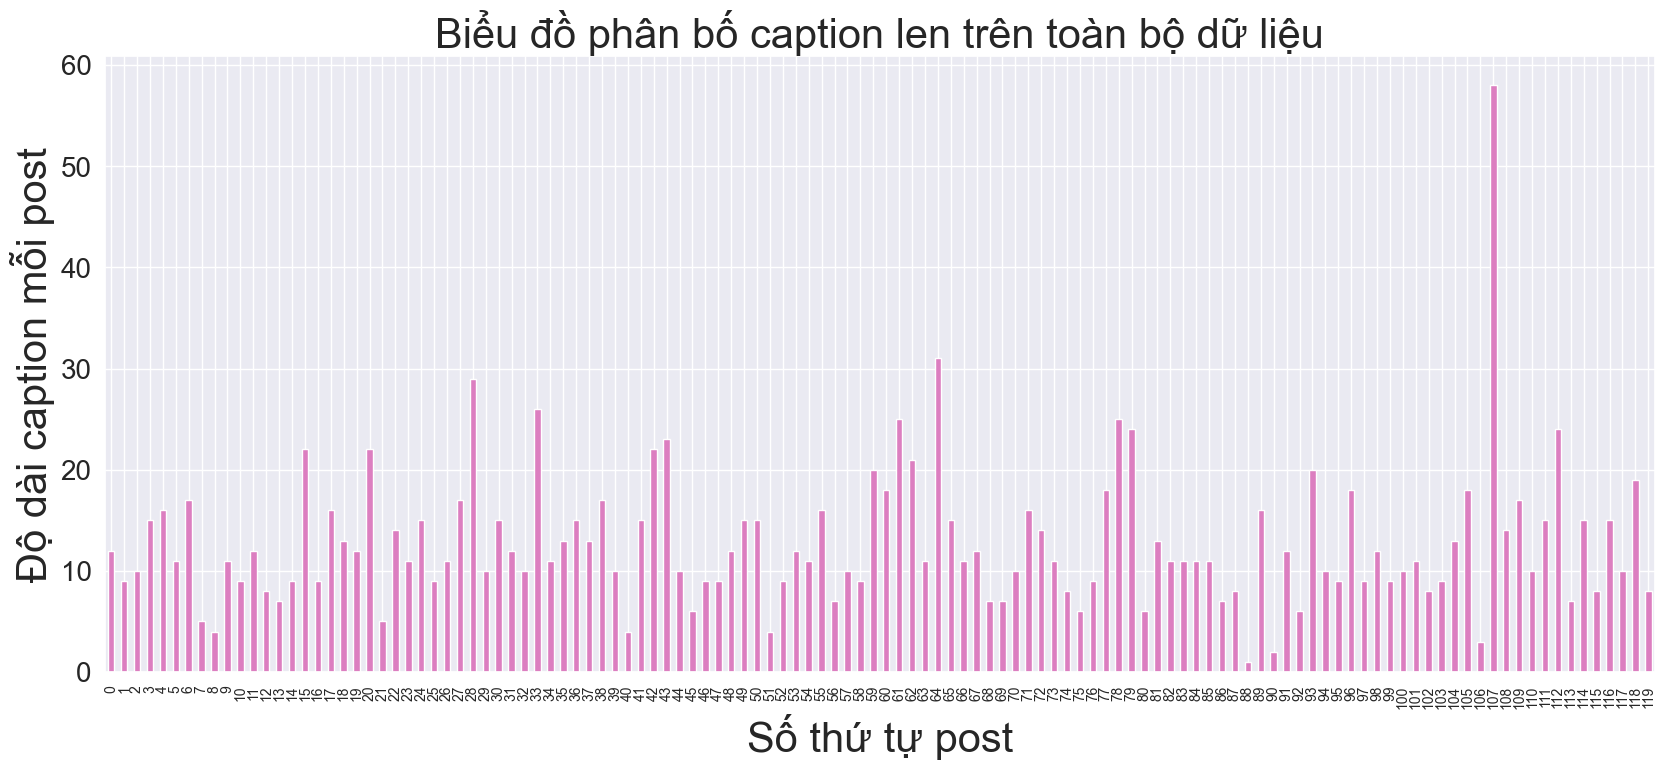

In [223]:
df['post_len'] = df['post_text'].str.split().str.len()
colors = sns.color_palette('muted')[6]
plt.title("Biểu đồ phân bố caption len trên toàn bộ dữ liệu",size=30)
plt.xlabel("Số thứ tự post",size=30)
plt.ylabel("Độ dài caption mỗi post",size=30)
plt.xticks(size=10)
plt.yticks(size=20)
df['post_len'].plot(kind='bar',figsize=(20,8),color = colors)

Một số hình ảnh trong post

In [224]:
import math
math.sqrt(120)

10.954451150103322

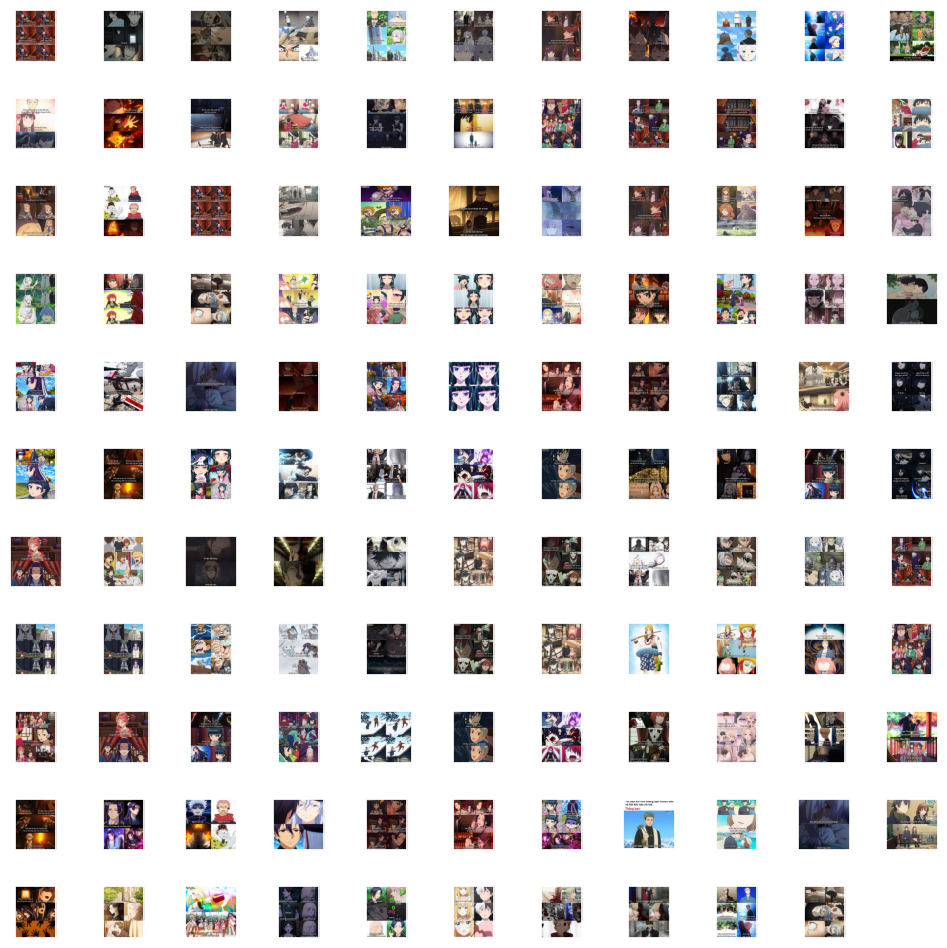

In [225]:
import os

# Specify the directory containing the images
image_dir = "../ImageClassification/Save_Img/"

# Get a list of all image files in the directory
image_files = os.listdir(image_dir)

# Create a figure for plotting the images
fig = plt.figure(figsize=(10, 10))

# Iterate through the image files and plot them on the figure
for i, image_file in enumerate(image_files):
    image_path = os.path.join(image_dir, image_file)
    image = plt.imread(image_path)

    # Create a subplot for each image
    ax = fig.add_subplot(11, 11, i + 1)
    ax.imshow(image)

    # Remove the subplot labels
    ax.set_xticks([])
    ax.set_yticks([])

# Adjust the layout of the subplots
plt.tight_layout()

# Show the plot
plt.show()